# Dependencias

In [1]:
import pandas as pd
import csv
import datetime
from datetime import date
from datetime import timedelta

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patheffects as pe

In [2]:
import os
directory = os.getcwd() + "/"
directory 

'/home/runner/work/vacunacion/vacunacion/'

# Variables y Funciones


In [3]:
#VARIABLES

plt.style.use("default")
plt.style.use("Solarize_Light2")

ordenado = ['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']

color_vac_parcial1 = 	"orange"
color_vac_parcial2 = color_vac_parcial1
color_vac_completa1 = "#f55919"
color_vac_completa2 = color_vac_completa1
color_total_dosis1 = "#38deaa"
color_total_dosis2 = color_total_dosis1

color3 = "blue"
color4 = "#7537be"

color_terceras = "m"

col_vac_almenos = "m"
col_vac_comp = "pink"

# background_color1 = "black"
# background_color2 = "black"

atribucion = "Datos del Ministerio de Salud (Unidos Contra el Covid) vía @mauforonda y @arraya_eduardo. Visualización de BoliGráfica"

In [4]:
plt.rcParams['font.family'] = 'Manjari'

In [5]:
def annotate_bar(series, axis, text_color="black", fontsize=12, x_offset=0, y_offset=0, edgecolor="black", facecolor="white", alpha=0.5, start_text="", end_text=""):
  for p in axs[axis].patches:
    axs[axis].annotate(start_text + str(p.get_width()) + end_text,
        xy = (p.get_width() + x_offset, p.get_y() + y_offset),
        fontsize = fontsize,
         color = text_color,
          bbox={
            'edgecolor': edgecolor,
            'facecolor': facecolor, 
            'alpha': alpha}
           )


def annotate_last_flat(df, column_index, axis = 0, text_color="black", fontsize=12, offset_days=0, edgecolor="black", facecolor="white", alpha=0.5,start_text="", end_text=""):
  axs[axis].annotate(start_text + str(df.iloc[-1, column_index].round(0).astype(int)) + end_text, 
           xy = (df.index[-1] + datetime.timedelta(days=offset_days), df.iloc[-1,column_index]),
           fontsize=fontsize,
           color=text_color,
           bbox = {"edgecolor":edgecolor,
                   "facecolor":facecolor,
                   "alpha":alpha}
           )

def annotate_last_nonflat(df, column_index, axis, text_color="black", fontsize=12, offset_days=0, edgecolor="black", facecolor="white", alpha=0.5, start_text="", end_text=""):
  axs[axis].annotate(start_text + str(df.iloc[-1, column_index]) + end_text, 
           xy = (df.index[-1] + datetime.timedelta(days=offset_days), df.iloc[-1,column_index]),
           fontsize=fontsize,
           color=text_color,
           bbox = {"edgecolor":edgecolor,
                   "facecolor":facecolor,
                   "alpha":alpha}
           )

# Revisar Base de Datos (bolcuantas, mauforonda, edu MF2)

## habitantes

In [6]:
habitantes = pd.read_csv("https://raw.githubusercontent.com/dquintani/covid/main/habitantes.csv",index_col = 0)
habitantes = habitantes[ordenado]
# habitantes = habitantes.rename(index={:"habitantes"})

#habitantes = habitantes[habitantes.columns].apply(pd.to_numeric, errors = "coerce")

#habitantes.to_csv(directory + "habitantes.csv")
habitantes

Bolivia   La Paz  Cochabamba  Santa Cruz   Oruro  Potosí  Chuquisaca  \
NaN  11620000  2927000     2029000     3370000  538000  902000      637000   

     Tarija    Beni   Pando  
NaN  583000  480000  154000

In [7]:
# #+18 alt
# pob_vacunable = pd.read_csv("https://raw.githubusercontent.com/pr0nstar/covid19-pruebas/master/data/vaccine.target.population.csv", index_col=0)
# pob_vacunable.insert(4,"total vacunable", pob_vacunable.sum(axis=1))
# pob_vac = pd.DataFrame(pob_vacunable.iloc[:,-1]).T
# pob_vac.insert(0,"Bolivia", pob_vacunable.iloc[:,-1].sum())
# pob_vac = pob_vac.rename(columns={"Potosi":"Potosí"})
# pob_vac = pob_vac[ordenado]
# pob_vac

In [8]:
pob_vacunable = pd.read_csv("https://raw.githubusercontent.com/pr0nstar/covid19-pruebas/master/data/bolivia.population.depts.2021.csv", index_col=0)
pob_vacunable.insert(4,"Bolivia", pob_vacunable.sum(axis=1))
pob_vac = pob_vacunable[::-1].cumsum()

pob_vac = pob_vac.loc["5"] # INSERT AGE HERE
pob_vac = pob_vac[ordenado]
pob_vac=pd.DataFrame(pob_vac).T
pob_vac

Bolivia   La Paz  Cochabamba  Santa Cruz   Oruro  Potosí  Chuquisaca  \
5  10655356  2752589     1880903     3005737  499847  810989      587721   

   Tarija    Beni   Pando  
5  535524  442937  139109

In [9]:
## +18
porc_vacunable = pob_vac.div(habitantes.iloc[0])*100
porc_vacunable = porc_vacunable.round(1)
porc_vacunable =porc_vacunable.rename(index={"total vacunable":"porcentaje vacunable"})
porc_vacunable

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  Chuquisaca  Tarija  \
5     91.7    94.0        92.7        89.2   92.9    89.9        92.3    91.9   

   Beni  Pando  
5  92.3   90.3

## importar BolCuantas (archivado)

In [10]:
# url1_BC = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS1GavkhNJ3z6aF83fOVHMJTtkfZ71Pianv4O6Qvq5xutWh3hSoNqMVF5ZBo0mj8Vw5oOBbs7t_fymK/pub?gid=0&single=true&output=csv"
# url2_BC = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS1GavkhNJ3z6aF83fOVHMJTtkfZ71Pianv4O6Qvq5xutWh3hSoNqMVF5ZBo0mj8Vw5oOBbs7t_fymK/pub?gid=2002090716&single=true&output=csv"

In [11]:
# primeras_BC = pd.read_csv(url1_BC, index_col=0)
# primeras_BC = primeras_BC[ordenado]#.fillna(0)
# primeras_BC.index = pd.to_datetime(primeras_BC.index, format= "%Y-%m-%d")
# primeras_BC

In [12]:
# segundas_BC = pd.read_csv(url2_BC, index_col=0)
# segundas_BC = segundas_BC[ordenado]#.fillna(0)
# segundas_BC.index = pd.to_datetime(segundas_BC.index, format= "%Y-%m-%d") 

# segundas_BC

## importar mauforonda 1 (archivado)


In [13]:
# url1_MF = "https://raw.githubusercontent.com/mauforonda/vacunas/master/datos/primera.csv"
# url2_MF = "https://raw.githubusercontent.com/mauforonda/vacunas/master/datos/segunda.csv"

In [14]:
# primeras_MF = pd.read_csv(url1_MF, index_col=0)
# primeras_MF = primeras_MF[['Total', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosi', 'Chuquisaca','Tarija','Beni','Pando']].fillna(0)
# primeras_MF = primeras_MF.rename(columns={"Total": "Bolivia", "Potosi": "Potosí"})
# #primeras_MF.index = pd.to_datetime(primeras_MF.index) 

# primeras_MF

In [15]:
# segundas_MF = pd.read_csv(url2_MF, index_col=0)
# segundas_MF = segundas_MF[['Total', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosi', 'Chuquisaca','Tarija','Beni','Pando']].fillna(0)
# segundas_MF = segundas_MF.rename(columns={"Total": "Bolivia", "Potosi": "Potosí"})
# #segundas_MF.index = pd.to_datetime(segundas_MF.index) 


# segundas_MF

## IMPORTAR MAUFORONDA 2 - via Unidos contra el Covid

In [16]:
url_MF2 = "https://raw.githubusercontent.com/mauforonda/vacunas_unidoscontraelcovid/master/consolidado/vacunas.csv"
MF2 = pd.read_csv(url_MF2, index_col=0)
MF2.index = pd.to_datetime(MF2.index)
MF2

tipo departamento   dosis
fecha                                   
2021-02-03  primera         Beni      48
2021-02-03  primera   Chuquisaca     303
2021-02-03  primera   Cochabamba     687
2021-02-03  primera       La Paz     361
2021-02-03  primera        Oruro     106
...             ...          ...     ...
2021-09-29    única        Oruro   31676
2021-09-29    única        Pando       0
2021-09-29    única       Potosi   71231
2021-09-29    única   Santa Cruz  315098
2021-09-29    única       Tarija   33124

[4446 rows x 3 columns]

Bolivia    Beni  Chuquisaca  Cochabamba  La Paz   Oruro  Pando  \
2021-02-03     3560      48         303         687     361     106    388   
2021-02-04     5172      63         304        1044    1030     195    488   
2021-02-05     7430     154         529        1369    1783     300    550   
2021-02-06     7636     170         530        1369    1859     412    550   
2021-02-07     7752     199         530        1369    1859     499    550   
...             ...     ...         ...         ...     ...     ...    ...   
2021-09-24  3389289  132215      206190      598893  802413  173423  48690   
2021-09-25  3391641  132221      206347      599276  804117  173461  48691   
2021-09-26  3393267  132224      206390      599503  805446  173470  48691   
2021-09-27  3403277  132592      207115      601556  810159  173869  48778   
2021-09-29  3420706  133684      208072      605362  817993  174791  49002   

            Potosí  Santa Cruz  Tarija  
2021-02-03     203        1264     200  
2021-02-04     293        1393     362  
2021-02-05     396        1638     711  
2021-02-06     396        1638     712  
2021-02-07     396        1638     712  
...            ...         ...     ...  
2021-09-24  185871     1010852  230742  
2021-09-25  185905     1010857  230766  
2021-09-26  185918     1010858  230767  
2021-09-27  187039     1010987  231182  
2021-09-29  188445     1011489  231868  

[216 rows x 10 columns]

findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.


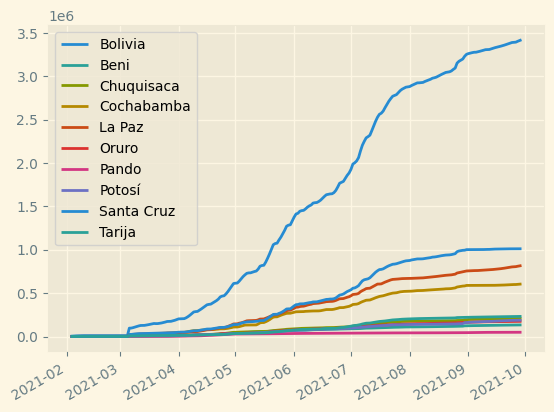

In [17]:
lista_dptm = list(MF2.groupby("departamento").count().index.array)

primera = pd.DataFrame()

for i in ["primera"]:
    for k in range(len(lista_dptm)):
        primerax = MF2[(MF2.tipo==i) & (MF2.departamento==lista_dptm[k])].rename({"dosis":lista_dptm[k]},axis=1).iloc[:,-1]
        primera = pd.concat([primera, primerax], axis=1)
        # display(primera)

primeras = primera.rename(columns={"Potosi": "Potosí"})
primeras.index = pd.to_datetime(primeras.index)

primeras.insert(0,"Bolivia",primeras.sum(axis=1))
primeras.plot()


primeras

Bolivia   Beni  Chuquisaca  Cochabamba  La Paz   Oruro  Pando  \
2021-02-22      210      0          10          24      12       0     85   
2021-02-23     1030      6         122         166      31      25    239   
2021-02-24     2634     42         276         588     264      99    349   
2021-02-25     6630     43         299        1320    1918     281    439   
2021-02-28     7702    237         524        1320    1918     487    515   
...             ...    ...         ...         ...     ...     ...    ...   
2021-09-24  2391586  86168      156797      464718  554396  130963  33298   
2021-09-25  2397494  86183      157918      466010  556207  131687  33298   
2021-09-26  2399229  86188      157950      466171  556815  131803  33324   
2021-09-27  2433274  87272      159646      470684  565709  134175  33457   
2021-09-29  2487482  89148      162071      477506  581773  137556  33779   

            Potosí  Santa Cruz  Tarija  
2021-02-22      54           0      25  
2021-02-23     123         244      74  
2021-02-24     173         619     224  
2021-02-25     265        1664     401  
2021-02-28     365        1664     672  
...            ...         ...     ...  
2021-09-24  131730      649332  184184  
2021-09-25  131970      649834  184387  
2021-09-26  131993      650593  184392  
2021-09-27  134317      661007  187007  
2021-09-29  137649      677856  190144  

[208 rows x 10 columns]

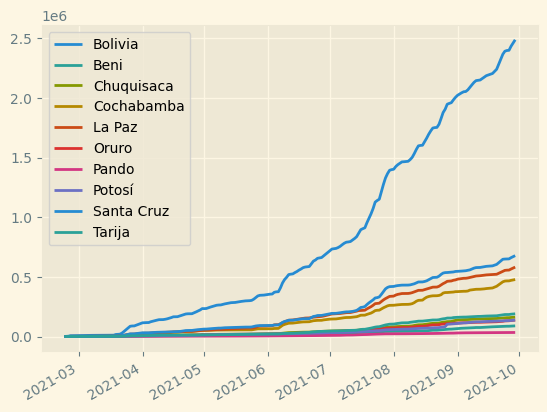

In [18]:
segunda = pd.DataFrame()

for i in ["segunda"]:
    for k in range(len(lista_dptm)):
        segundax = MF2[(MF2.tipo==i) & (MF2.departamento==lista_dptm[k])].rename({"dosis":lista_dptm[k]},axis=1).iloc[:,-1]
        segunda = pd.concat([segunda, segundax], axis=1)

segundas = segunda.rename(columns={"Potosi": "Potosí"})
segundas.index = pd.to_datetime(segundas.index)
segundas.insert(0,"Bolivia",segundas.sum(axis=1))
segundas.plot()

segundas

Text(0.5, 1.0, '~~~fdksl')

findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.


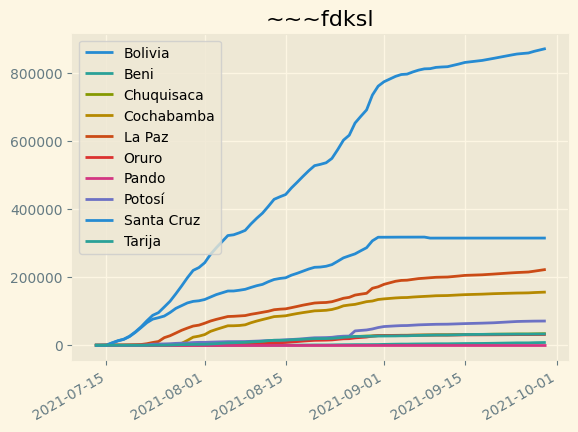

In [19]:
unica = pd.DataFrame()

for i in ["única"]:
    for k in range(len(lista_dptm)):
        unicax = MF2[(MF2.tipo==i) & (MF2.departamento==lista_dptm[k])].rename({"dosis":lista_dptm[k]},axis=1).iloc[:,-1]
        unica = pd.concat([unica, unicax], axis=1)

unicas = unica.rename(columns={"Potosi": "Potosí"})
unicas.index = pd.to_datetime(unicas.index)
unicas.insert(0,"Bolivia",unicas.sum(axis=1))
unicas.plot()

unicas = unicas.div(primeras/primeras).fillna(0)

unicas.tail()
plt.title("~~~fdksl")

## importar eduarrayas vaccinations.csv

In [20]:
#NEW
df_vac_edu = pd.read_csv("https://github.com/sociedatos/covid19-bo-vacunas_por_departamento/raw/master/vaccinations.csv", 
    header=[0, 1], 
    index_col=[0])
display(df_vac_edu)


La Paz                                Cochabamba            \
              Primera    Segunda   Tercera     Unica    Primera   Segunda   
2021-02-02       12.0        0.0       0.0       0.0      278.0       0.0   
2021-02-03      361.0        0.0       0.0       0.0      687.0       0.0   
2021-02-04     1030.0        0.0       0.0       0.0     1044.0       0.0   
2021-02-05     1783.0        0.0       0.0       0.0     1369.0       0.0   
2021-02-06     1859.0        0.0       0.0       0.0     1369.0       0.0   
...               ...        ...       ...       ...        ...       ...   
2022-02-02  1417108.0  1026127.0  228430.0  276428.0  1103562.0  840934.0   
2022-02-03  1418582.0  1030563.0  230074.0  276428.0  1105021.0  845079.0   
2022-02-04  1421488.0  1037075.0  232789.0  276428.0  1107300.0  850664.0   
2022-02-05  1422879.0  1040787.0  233958.0  276428.0  1108274.0  852502.0   
2022-02-06  1423057.0  1041327.0  234153.0  276428.0  1108727.0  853219.0   

                               Santa Cruz             ... Chuquisaca           \
             Tercera     Unica    Primera    Segunda  ...    Tercera    Unica   
2021-02-02       0.0       0.0      647.0        0.0  ...        0.0      0.0   
2021-02-03       0.0       0.0     1264.0        0.0  ...        0.0      0.0   
2021-02-04       0.0       0.0     1393.0        0.0  ...        0.0      0.0   
2021-02-05       0.0       0.0     1638.0        0.0  ...        0.0      0.0   
2021-02-06       0.0       0.0     1638.0        0.0  ...        0.0      0.0   
...              ...       ...        ...        ...  ...        ...      ...   
2022-02-02  157993.0  171730.0  1657247.0  1235806.0  ...    68700.0  38929.0   
2022-02-03  159582.0  171730.0  1659981.0  1241902.0  ...    69021.0  38929.0   
2022-02-04  161736.0  171730.0  1663972.0  1249957.0  ...    69684.0  38929.0   
2022-02-05  162666.0  171730.0  1665252.0  1252430.0  ...    69964.0  38929.0   
2022-02-06  163180.0  171730.0  1665663.0  1253028.0  ...    69987.0  38929.0   

                Beni                                Pando                    \
             Primera   Segunda  Tercera    Unica  Primera  Segunda  Tercera   
2021-02-02       6.0       0.0      0.0      0.0    270.0      0.0      0.0   
2021-02-03      48.0       0.0      0.0      0.0    388.0      0.0      0.0   
2021-02-04      63.0       0.0      0.0      0.0    488.0      0.0      0.0   
2021-02-05     154.0       0.0      0.0      0.0    550.0      0.0      0.0   
2021-02-06     170.0       0.0      0.0      0.0    550.0      0.0      0.0   
...              ...       ...      ...      ...      ...      ...      ...   
2022-02-02  213983.0  146527.0  30841.0  19739.0  70778.0  49845.0  15137.0   
2022-02-03  214257.0  147065.0  31002.0  19739.0  70852.0  50018.0  15211.0   
2022-02-04  214794.0  147844.0  31226.0  19739.0  71012.0  50231.0  15305.0   
2022-02-05  214936.0  148149.0  31291.0  19739.0  71038.0  50303.0  15311.0   
2022-02-06  214942.0  148156.0  31291.0  19739.0  71038.0  50303.0  15311.0   

                  
           Unica  
2021-02-02   0.0  
2021-02-03   0.0  
2021-02-04   0.0  
2021-02-05   0.0  
2021-02-06   0.0  
...          ...  
2022-02-02   0.0  
2022-02-03   0.0  
2022-02-04   0.0  
2022-02-05   0.0  
2022-02-06   0.0  

[369 rows x 36 columns]

In [21]:
# df_vac_edu = pd.read_csv("https://raw.githubusercontent.com/pr0nstar/covid19-data/master/processed/bolivia/vaccinations.csv", 
#     header=[0, 1], 
#     index_col=[0])
# display(df_vac_edu)

df_vac_edu.index = pd.to_datetime(df_vac_edu.index)

# vaccinations_df_columns = df_vac_edu.columns.map(lambda _: [__.lower() for __ in _])
# df_vac_edu.columns = pd.MultiIndex.from_tuples([*vaccinations_df_columns.values])


dptm_names = ['Beni', 'Chuquisaca', 'Cochabamba', 'La Paz', 'Oruro', 'Pando', 'Potosi','Santa Cruz', 'Tarija']
dptm_names_fix = ['Beni', 'Chuquisaca', 'Cochabamba', 'La Paz', 'Oruro', 'Pando', 'Potosí','Santa Cruz', 'Tarija']


dfx = pd.DataFrame()
for i in range(len(dptm_names)):
    df1 = df_vac_edu[dptm_names[i]].Primera
    df1.name = dptm_names_fix[i]
    dfx = pd.concat([dfx, df1], axis=1)
    # display(dfx)
primeras_edu = dfx
primeras_edu["Bolivia"] = primeras_edu.sum(axis=1)

dfx = pd.DataFrame()
for i in range(len(dptm_names)):
    df1 = df_vac_edu[dptm_names[i]].Segunda
    df1.name = dptm_names_fix[i]
    dfx = pd.concat([dfx, df1], axis=1)
segundas_edu = dfx
segundas_edu["Bolivia"] = segundas_edu.sum(axis=1)

dfx = pd.DataFrame()
for i in range(len(dptm_names)):
    df1 = df_vac_edu[dptm_names[i]].Unica
    df1.name = dptm_names_fix[i]
    dfx = pd.concat([dfx, df1], axis=1)
unicas_edu = dfx
unicas_edu["Bolivia"] = unicas_edu.sum(axis=1)

##new
dfx = pd.DataFrame()
for i in range(len(dptm_names)):
    df1 = df_vac_edu[dptm_names[i]].Tercera
    df1.name = dptm_names_fix[i]
    dfx = pd.concat([dfx, df1], axis=1)
terceras_edu = dfx
terceras_edu["Bolivia"] = terceras_edu.sum(axis=1)
##end new

primeras_edu.index = df_vac_edu.index
segundas_edu.index = df_vac_edu.index
unicas_edu.index = df_vac_edu.index
terceras_edu.index = df_vac_edu.index # new

primeras_edu = primeras_edu[ordenado]
segundas_edu = segundas_edu[ordenado]
unicas_edu = unicas_edu[ordenado]
terceras_edu = terceras_edu[ordenado]

# display(primeras_edu)
# display(segundas_edu)
# display(unicas_edu)
display(terceras_edu)

Bolivia    La Paz  Cochabamba  Santa Cruz    Oruro   Potosí  \
2021-02-02       0.0       0.0         0.0         0.0      0.0      0.0   
2021-02-03       0.0       0.0         0.0         0.0      0.0      0.0   
2021-02-04       0.0       0.0         0.0         0.0      0.0      0.0   
2021-02-05       0.0       0.0         0.0         0.0      0.0      0.0   
2021-02-06       0.0       0.0         0.0         0.0      0.0      0.0   
...              ...       ...         ...         ...      ...      ...   
2022-02-02  892146.0  228430.0    157993.0    220336.0  44511.0  55349.0   
2022-02-03  899069.0  230074.0    159582.0    222146.0  44692.0  55706.0   
2022-02-04  909345.0  232789.0    161736.0    224542.0  45040.0  56185.0   
2022-02-05  913452.0  233958.0    162666.0    225399.0  45175.0  56427.0   
2022-02-06  914644.0  234153.0    163180.0    225709.0  45212.0  56509.0   

            Chuquisaca   Tarija     Beni    Pando  
2021-02-02         0.0      0.0      0.0      0.0  
2021-02-03         0.0      0.0      0.0      0.0  
2021-02-04         0.0      0.0      0.0      0.0  
2021-02-05         0.0      0.0      0.0      0.0  
2021-02-06         0.0      0.0      0.0      0.0  
...                ...      ...      ...      ...  
2022-02-02     68700.0  70849.0  30841.0  15137.0  
2022-02-03     69021.0  71635.0  31002.0  15211.0  
2022-02-04     69684.0  72838.0  31226.0  15305.0  
2022-02-05     69964.0  73261.0  31291.0  15311.0  
2022-02-06     69987.0  73292.0  31291.0  15311.0  

[369 rows x 10 columns]

# Consolidar (segundas_alt = TRUE!) ------ actual=EDU

In [22]:
# print("bolcuantas dias = " + "{}".format(len(primeras_BC)))
# print("maufronda dias= " + "{}".format(len(primeras_MF)))
primeras_MF2 = primeras
print("maufronda 2 dias= " + "{}".format(len(primeras_MF2)))
print("edu dias= " + "{}".format(len(primeras_edu)))

# if len(primeras_BC) > len(primeras_MF):
#   primeras = primeras_BC
#   segundas = segundas_BC
#   print("BolCuantas más actualizada, activada ñie")
# elif len(primeras_BC) < len(primeras_MF):
#   primeras = primeras_MF
#   segundas = segundas_MF
#   print("mauforonda más actualizada, activada ñie")

# elif len(primeras_BC) == len(primeras_MF):
#   primeras = primeras_MF
#   segundas = segundas_MF
#   print("todas igual de actualizadas, mauforonda activada ñie")


#final define



primeras = primeras_edu
segundas = segundas_edu
unicas = unicas_edu
terceras = terceras_edu



# primeras.loc["2021-10-29", "Santa Cruz"] = 1054000
primeras.tail(50)

maufronda 2 dias= 216
edu dias= 369


Bolivia     La Paz  Cochabamba  Santa Cruz     Oruro    Potosí  \
2021-12-18  4374289.0  1015483.0    837350.0   1285310.0  229194.0  238153.0   
2021-12-19  4384221.0  1015930.0    837754.0   1293154.0  229245.0  238191.0   
2021-12-20  4406630.0  1019666.0    841532.0   1302284.0  230491.0  239387.0   
2021-12-21  4429756.0  1023909.0    844824.0   1311217.0  231758.0  240818.0   
2021-12-22  4450426.0  1027472.0    848167.0   1319657.0  232849.0  241736.0   
2021-12-23  4466441.0  1030311.0    851486.0   1324764.0  233864.0  242839.0   
2021-12-24  4480372.0  1033462.0    854123.0   1329487.0  234629.0  243791.0   
2021-12-25  4481396.0  1033818.0    854277.0   1329576.0  234699.0  243964.0   
2021-12-26  4483485.0  1034304.0    854621.0   1330643.0  234747.0  244062.0   
2021-12-27  4508822.0  1039276.0    860184.0   1338861.0  236120.0  245904.0   
2021-12-28  4553701.0  1050925.0    868761.0   1352784.0  238919.0  248032.0   
2021-12-29  4582835.0  1061126.0    873452.0   1358978.0  241190.0  249970.0   
2021-12-30  4629664.0  1074389.0    883224.0   1370302.0  244542.0  252149.0   
2022-01-01  4673515.0  1089256.0    892816.0   1379334.0  247433.0  254581.0   
2022-01-02  4678381.0  1091686.0    893709.0   1380493.0  247610.0  254741.0   
2022-01-03  4760233.0  1120323.0    906722.0   1393160.0  249854.0  265213.0   
2022-01-04  4856771.0  1155745.0    925739.0   1413178.0  257276.0  268878.0   
2022-01-05  4946230.0  1189153.0    946043.0   1428365.0  263898.0  272654.0   
2022-01-06  5042612.0  1224664.0    968426.0   1445305.0  269997.0  277973.0   
2022-01-07        0.0        NaN         NaN         NaN       NaN       NaN   
2022-01-08  5148259.0  1263452.0    992112.0   1465422.0  275300.0  283666.0   
2022-01-09  5158397.0  1266589.0    995038.0   1468138.0  275733.0  284161.0   
2022-01-10  5218708.0  1285736.0   1007332.0   1482760.0  278244.0  287797.0   
2022-01-11  5268785.0  1300082.0   1017623.0   1497292.0  280236.0  290129.0   
2022-01-12  5309383.0  1310893.0   1025594.0   1510932.0  281795.0  291418.0   
2022-01-13  5362817.0  1326083.0   1035236.0   1527358.0  283679.0  294465.0   
2022-01-14  5402601.0  1335372.0   1043086.0   1541524.0  285061.0  296378.0   
2022-01-15  5417860.0  1339004.0   1045954.0   1547025.0  285897.0  296829.0   
2022-01-16  5423419.0  1339976.0   1047851.0   1549269.0  286028.0  297019.0   
2022-01-17  5494299.0  1360634.0   1056906.0   1567253.0  287713.0  306367.0   
2022-01-18  5530671.0  1368002.0   1063308.0   1581586.0  288911.0  308433.0   
2022-01-19  5562359.0  1375238.0   1069131.0   1593431.0  289941.0  310120.0   
2022-01-20  5582759.0  1379553.0   1072729.0   1600940.0  290582.0  311427.0   
2022-01-21  5605820.0  1384297.0   1076859.0   1609606.0  291472.0  312690.0   
2022-01-22  5610310.0  1385579.0   1077557.0   1610953.0  291669.0  312949.0   
2022-01-23  5612586.0  1385924.0   1078118.0   1612136.0  291750.0  312982.0   
2022-01-24  5627130.0  1388199.0   1081025.0   1617953.0  292138.0  313717.0   
2022-01-25  5653093.0  1394205.0   1085564.0   1625616.0  292893.0  316538.0   
2022-01-26  5669847.0  1397790.0   1088707.0   1631340.0  293591.0  317539.0   
2022-01-27  5684344.0  1400897.0   1091550.0   1636768.0  294031.0  318282.0   
2022-01-28  5699229.0  1404031.0   1094633.0   1642067.0  294483.0  319155.0   
2022-01-29  5706108.0  1406313.0   1095585.0   1643857.0  294793.0  319535.0   
2022-01-30  5708149.0  1406871.0   1096171.0   1644676.0  294830.0  319566.0   
2022-01-31  5731783.0  1413351.0   1099974.0   1650547.0  295648.0  322586.0   
2022-02-01  5741279.0  1415224.0   1101712.0   1653913.0  295948.0  323210.0   
2022-02-02  5750657.0  1417108.0   1103562.0   1657247.0  296285.0  323800.0   
2022-02-03  5758197.0  1418582.0   1105021.0   1659981.0  296606.0  324203.0   
2022-02-04  5771179.0  1421488.0   1107300.0   1663972.0  296988.0  325353.0   
2022-02-05  5776237.0  1422879.0   1108274.0   1665252.0  297227.0  325682.0   
2022-02-06  57

In [23]:
primeras_edu#.index[-1]

Bolivia     La Paz  Cochabamba  Santa Cruz     Oruro    Potosí  \
2021-02-02     1589.0       12.0       278.0       647.0      26.0     138.0   
2021-02-03     3560.0      361.0       687.0      1264.0     106.0     203.0   
2021-02-04     5172.0     1030.0      1044.0      1393.0     195.0     293.0   
2021-02-05     7430.0     1783.0      1369.0      1638.0     300.0     396.0   
2021-02-06     7636.0     1859.0      1369.0      1638.0     412.0     396.0   
...               ...        ...         ...         ...       ...       ...   
2022-02-02  5750657.0  1417108.0   1103562.0   1657247.0  296285.0  323800.0   
2022-02-03  5758197.0  1418582.0   1105021.0   1659981.0  296606.0  324203.0   
2022-02-04  5771179.0  1421488.0   1107300.0   1663972.0  296988.0  325353.0   
2022-02-05  5776237.0  1422879.0   1108274.0   1665252.0  297227.0  325682.0   
2022-02-06  5777373.0  1423057.0   1108727.0   1665663.0  297240.0  325743.0   

            Chuquisaca    Tarija      Beni    Pando  
2021-02-02       122.0      90.0       6.0    270.0  
2021-02-03       303.0     200.0      48.0    388.0  
2021-02-04       304.0     362.0      63.0    488.0  
2021-02-05       529.0     711.0     154.0    550.0  
2021-02-06       530.0     712.0     170.0    550.0  
...                ...       ...       ...      ...  
2022-02-02    329525.0  338369.0  213983.0  70778.0  
2022-02-03    329745.0  338950.0  214257.0  70852.0  
2022-02-04    330362.0  339910.0  214794.0  71012.0  
2022-02-05    330726.0  340223.0  214936.0  71038.0  
2022-02-06    330730.0  340233.0  214942.0  71038.0  

[369 rows x 10 columns]

## Re-Consolidar

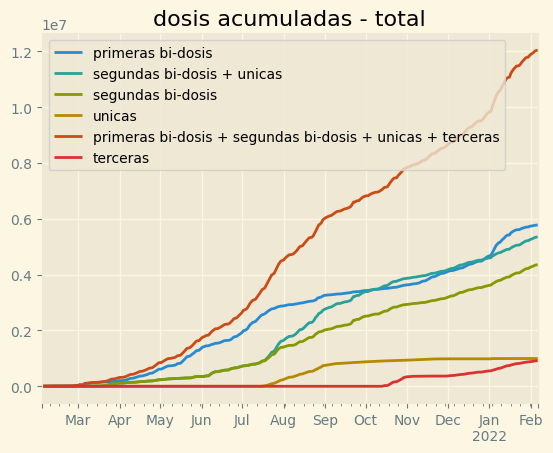

In [24]:
#DOSIS ACUMULADAS TOTAL
primeras_acum = primeras.dropna().resample("D").mean().interpolate("linear")
segundas_acum = segundas.dropna().resample("D").mean().interpolate("linear") + unicas.dropna().resample("D").mean().interpolate("linear")
unicas_acum = unicas.dropna().resample("D").mean().interpolate("linear")
segundas_acum_alt = segundas.dropna().resample("D").mean().interpolate("linear")
todas_acum = primeras.dropna().resample("D").mean().interpolate("linear") + segundas.dropna().resample("D").mean().interpolate("linear") + unicas.dropna().resample("D").mean().interpolate() + terceras.dropna().resample("D").mean().interpolate()

primeras_acum.index = pd.to_datetime(primeras_acum.index) 
segundas_acum.index = pd.to_datetime(segundas_acum.index)
segundas_acum_alt.index = pd.to_datetime(segundas_acum_alt.index)

todas_acum.index = pd.to_datetime(todas_acum.index)

#new
terceras_acum = terceras_edu.dropna().resample("D").mean().interpolate("linear")
terceras_acum.index = pd.to_datetime(terceras_acum.index)
#end new


plt.title("dosis acumuladas - total")
primeras_acum.Bolivia.plot(label="primeras bi-dosis")
segundas_acum.Bolivia.plot(label="segundas bi-dosis + unicas")
segundas_acum_alt.Bolivia.plot(label="segundas bi-dosis")
unicas_acum.Bolivia.plot(label="unicas")
todas_acum.Bolivia.plot(label="primeras bi-dosis + segundas bi-dosis + unicas + terceras")
terceras_acum.Bolivia.plot(label="terceras")
plt.legend()

# todas_acum

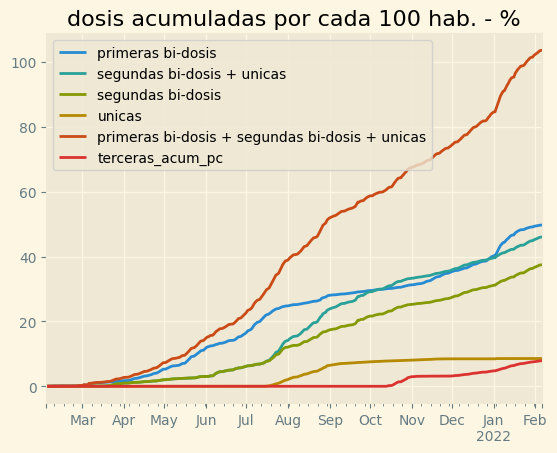

In [25]:
#DOSIS ACUMULADAS POR CADA 100 habitantes
primeras_acum_pc = primeras_acum.div(habitantes.iloc[0])*100
segundas_acum_pc = segundas_acum.div(habitantes.iloc[0])*100
segundas_acum_pc_alt = segundas_acum_alt.div(habitantes.iloc[0])*100
unicas_acum_pc = unicas_acum.div(habitantes.iloc[0])*100
todas_acum_pc = todas_acum.div(habitantes.iloc[0]) * 100

terceras_acum_pc = terceras_acum.div(habitantes.iloc[0]) * 100 # new


plt.title("dosis acumuladas por cada 100 hab. - %")
primeras_acum_pc.Bolivia.plot(label="primeras bi-dosis")
segundas_acum_pc.Bolivia.plot(label="segundas bi-dosis + unicas")
segundas_acum_pc_alt.Bolivia.plot(label="segundas bi-dosis")
unicas_acum_pc.Bolivia.plot(label="unicas")
todas_acum_pc.Bolivia.plot(label="primeras bi-dosis + segundas bi-dosis + unicas")
terceras_acum_pc.Bolivia.plot(label="terceras_acum_pc") #new

plt.legend()
# todas_acum_pc

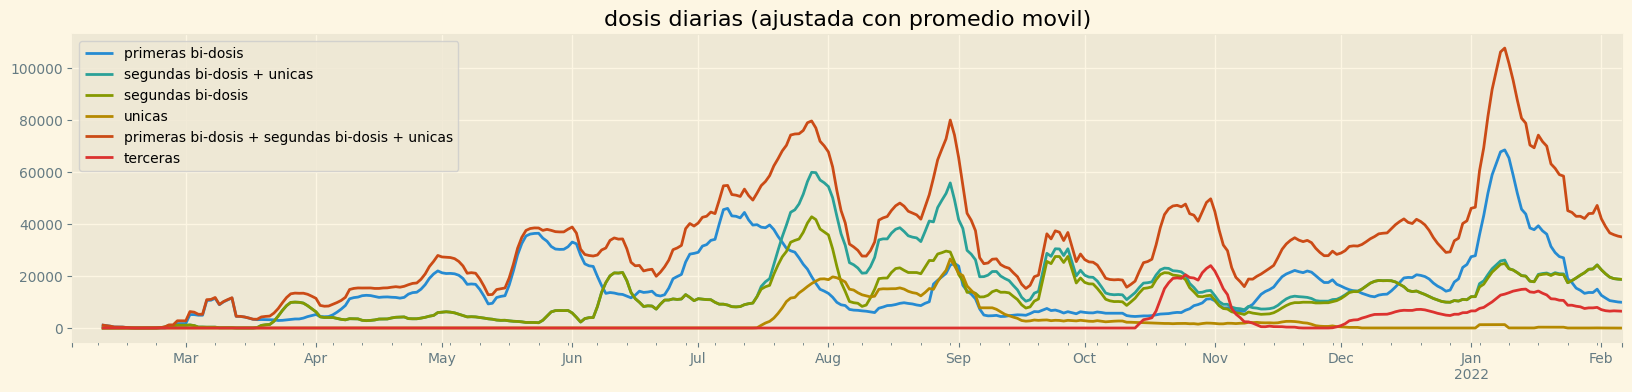

In [26]:
#DOSIS DIARIAS TOTAL
primeras_dia = primeras_acum.diff()
segundas_dia =  segundas_acum.diff()
segundas_dia_alt = segundas_acum_alt.diff()
unicas_dia = unicas_acum.diff()
todas_dia = todas_acum.diff()

terceras_dia = terceras_acum.diff() #diff

plt.rcParams['figure.figsize'] = (20,4)
plt.title("dosis diarias (ajustada con promedio movil)")
primeras_dia.Bolivia.rolling(7).mean().plot(label="primeras bi-dosis")
segundas_dia.Bolivia.rolling(7).mean().plot(label="segundas bi-dosis + unicas")
segundas_dia_alt.Bolivia.rolling(7).mean().plot(label="segundas bi-dosis")
# segundas_dia_alt.Bolivia.plot(label="segundas bi-dosis")

unicas_dia.Bolivia.rolling(7).mean().plot(label="unicas")
todas_dia.Bolivia.rolling(7).mean().plot(label="primeras bi-dosis + segundas bi-dosis + unicas")

terceras_dia.Bolivia.rolling(7).mean().plot(label="terceras")

plt.legend()

# todas_dia

In [27]:
unicas_dia

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2021-02-02      NaN     NaN         NaN         NaN    NaN     NaN   
2021-02-03      0.0     0.0         0.0         0.0    0.0     0.0   
2021-02-04      0.0     0.0         0.0         0.0    0.0     0.0   
2021-02-05      0.0     0.0         0.0         0.0    0.0     0.0   
2021-02-06      0.0     0.0         0.0         0.0    0.0     0.0   
...             ...     ...         ...         ...    ...     ...   
2022-02-02      0.0     0.0         0.0         0.0    0.0     0.0   
2022-02-03      0.0     0.0         0.0         0.0    0.0     0.0   
2022-02-04      0.0     0.0         0.0         0.0    0.0     0.0   
2022-02-05      0.0     0.0         0.0         0.0    0.0     0.0   
2022-02-06      0.0     0.0         0.0         0.0    0.0     0.0   

            Chuquisaca  Tarija  Beni  Pando  
2021-02-02         NaN     NaN   NaN    NaN  
2021-02-03         0.0     0.0   0.0    0.0  
2021-02-04         0.0     0.0   0.0    0.0  
2021-02-05         0.0     0.0   0.0    0.0  
2021-02-06         0.0     0.0   0.0    0.0  
...                ...     ...   ...    ...  
2022-02-02         0.0     0.0   0.0    0.0  
2022-02-03         0.0     0.0   0.0    0.0  
2022-02-04         0.0     0.0   0.0    0.0  
2022-02-05         0.0     0.0   0.0    0.0  
2022-02-06         0.0     0.0   0.0    0.0  

[370 rows x 10 columns]

(18910.0, 19029.0)

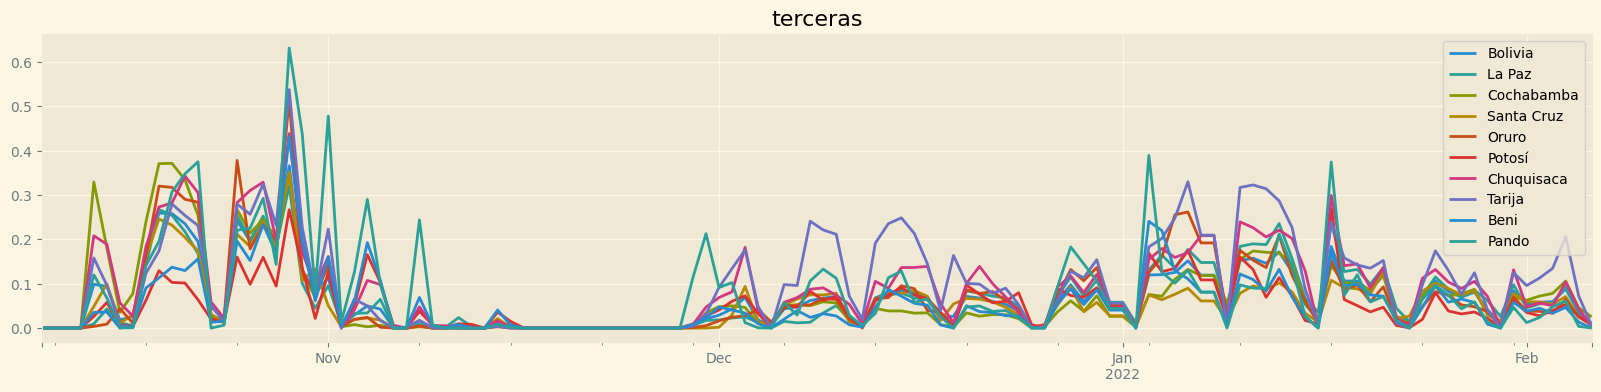

In [28]:
# DIARIAS POR CADA 100 HABITANTES - no graph here
primeras_dia_pc = primeras_dia.div(habitantes.iloc[0])*100
segundas_dia_pc = segundas_dia.div(habitantes.iloc[0])*100
segundas_dia_pc_alt = segundas_dia_alt.div(habitantes.iloc[0])*100
unicas_dia_pc = unicas_dia.div(habitantes.iloc[0])*100
todas_dia_pc = todas_dia.div(habitantes.iloc[0])*100

terceras_dia_pc = terceras_dia.div(habitantes.iloc[0])*100 #new

terceras_dia_pc.plot(title="terceras")
plt.xlim(xmin = terceras_dia_pc.index[250])
# todas_dia_pc.Bolivia.plot()
# todas_dia_pc

## almenos una dosis, primera vez y vacunacion completa

Bolivia     La Paz  Cochabamba  Santa Cruz     Oruro    Potosí  \
2021-02-02     1589.0       12.0       278.0       647.0      26.0     138.0   
2021-02-03     3560.0      361.0       687.0      1264.0     106.0     203.0   
2021-02-04     5172.0     1030.0      1044.0      1393.0     195.0     293.0   
2021-02-05     7430.0     1783.0      1369.0      1638.0     300.0     396.0   
2021-02-06     7636.0     1859.0      1369.0      1638.0     412.0     396.0   
...               ...        ...         ...         ...       ...       ...   
2022-02-02  6745618.0  1693536.0   1275292.0   1999091.0  328937.0  399490.0   
2022-02-03  6753158.0  1695010.0   1276751.0   2001825.0  329258.0  399893.0   
2022-02-04  6766140.0  1697916.0   1279030.0   2005816.0  329640.0  401043.0   
2022-02-05  6771198.0  1699307.0   1280004.0   2007096.0  329879.0  401372.0   
2022-02-06  6772334.0  1699485.0   1280457.0   2007507.0  329892.0  401433.0   

            Chuquisaca    Tarija      Beni    Pando  
2021-02-02       122.0      90.0       6.0    270.0  
2021-02-03       303.0     200.0      48.0    388.0  
2021-02-04       304.0     362.0      63.0    488.0  
2021-02-05       529.0     711.0     154.0    550.0  
2021-02-06       530.0     712.0     170.0    550.0  
...                ...       ...       ...      ...  
2022-02-02    368454.0  376318.0  233722.0  70778.0  
2022-02-03    368674.0  376899.0  233996.0  70852.0  
2022-02-04    369291.0  377859.0  234533.0  71012.0  
2022-02-05    369655.0  378172.0  234675.0  71038.0  
2022-02-06    369659.0  378182.0  234681.0  71038.0  

[370 rows x 10 columns]

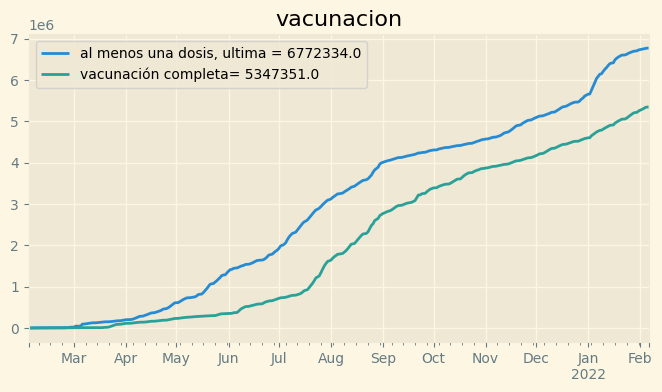

In [29]:
almenos_una = primeras.dropna().resample("D").mean().interpolate() + unicas.dropna().resample("D").mean().interpolate()
almenos_una_acum = almenos_una.dropna().resample("D").mean().interpolate()

completa = segundas.dropna().resample("D").mean().interpolate() + unicas.dropna().resample("D").mean().interpolate()
completa_acum = completa.dropna().resample("D").mean().interpolate()

plt.rcParams['figure.figsize'] = (8,4)
plt.title("vacunacion")
almenos_una_acum.Bolivia.plot(label="al menos una dosis, ultima = {}".format(almenos_una_acum.Bolivia[-1]))
completa_acum.Bolivia.plot(label="vacunación completa= {}".format(completa_acum.Bolivia[-1]))
plt.legend()

almenos_una_acum

## primera vez = alemnos una dosis acumulado diario (primeras + unicas)

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2021-02-02      NaN     NaN         NaN         NaN    NaN     NaN   
2021-02-03   1971.0   349.0       409.0       617.0   80.0    65.0   
2021-02-04   1612.0   669.0       357.0       129.0   89.0    90.0   
2021-02-05   2258.0   753.0       325.0       245.0  105.0   103.0   
2021-02-06    206.0    76.0         0.0         0.0  112.0     0.0   
...             ...     ...         ...         ...    ...     ...   
2022-02-02   9378.0  1884.0      1850.0      3334.0  337.0   590.0   
2022-02-03   7540.0  1474.0      1459.0      2734.0  321.0   403.0   
2022-02-04  12982.0  2906.0      2279.0      3991.0  382.0  1150.0   
2022-02-05   5058.0  1391.0       974.0      1280.0  239.0   329.0   
2022-02-06   1136.0   178.0       453.0       411.0   13.0    61.0   

            Chuquisaca  Tarija   Beni  Pando  
2021-02-02         NaN     NaN    NaN    NaN  
2021-02-03       181.0   110.0   42.0  118.0  
2021-02-04         1.0   162.0   15.0  100.0  
2021-02-05       225.0   349.0   91.0   62.0  
2021-02-06         1.0     1.0   16.0    0.0  
...                ...     ...    ...    ...  
2022-02-02       377.0   568.0  341.0   97.0  
2022-02-03       220.0   581.0  274.0   74.0  
2022-02-04       617.0   960.0  537.0  160.0  
2022-02-05       364.0   313.0  142.0   26.0  
2022-02-06         4.0    10.0    6.0    0.0  

[370 rows x 10 columns]

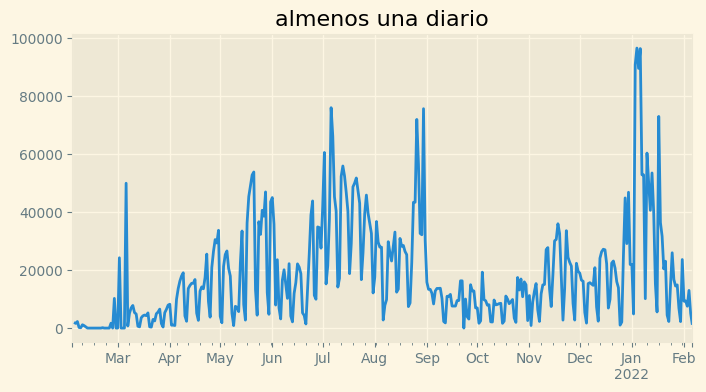

In [30]:
primera_vez = almenos_una_acum.diff()
# completa_dia = completa_acum.diff()
primera_vez.Bolivia.plot(title="almenos una diario")
# completa_dia.Bolivia.plot()
primera_vez

In [31]:
# almenos_una_pc_dia = primera_vez.div(habitantes.iloc[0])*100
# almenos_una_pc_dia.plot()
# almenos_una_pc_dia


<AxesSubplot:title={'center':'almenos una per capita acumulado'}>

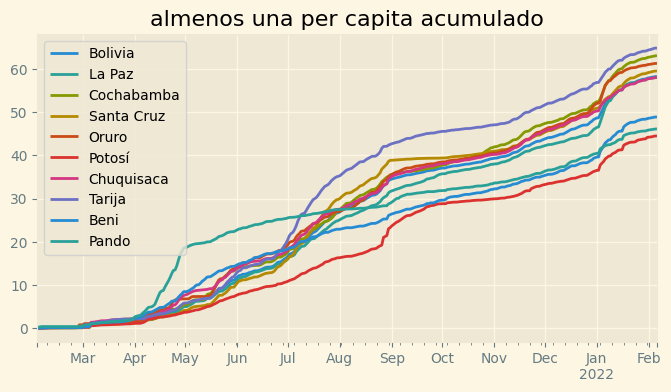

In [32]:
almenos_una_pc_acum = almenos_una_acum.div(habitantes.iloc[0])*100
completa_pc = completa_acum.div(habitantes.iloc[0])*100

almenos_una_vacunable_acum = almenos_una_acum.div(pob_vac.iloc[0])*100
completa_vacunable_acum = completa_acum.div(pob_vac.iloc[0])*100


almenos_una_pc_acum.plot(title="almenos una per capita acumulado")

<AxesSubplot:>

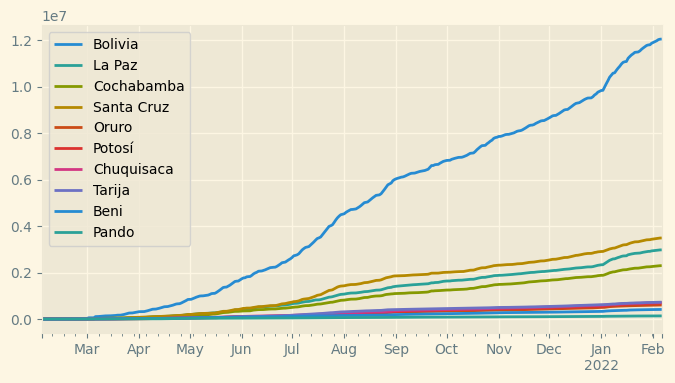

In [33]:
todas_acum.plot(subplots=False)

findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.


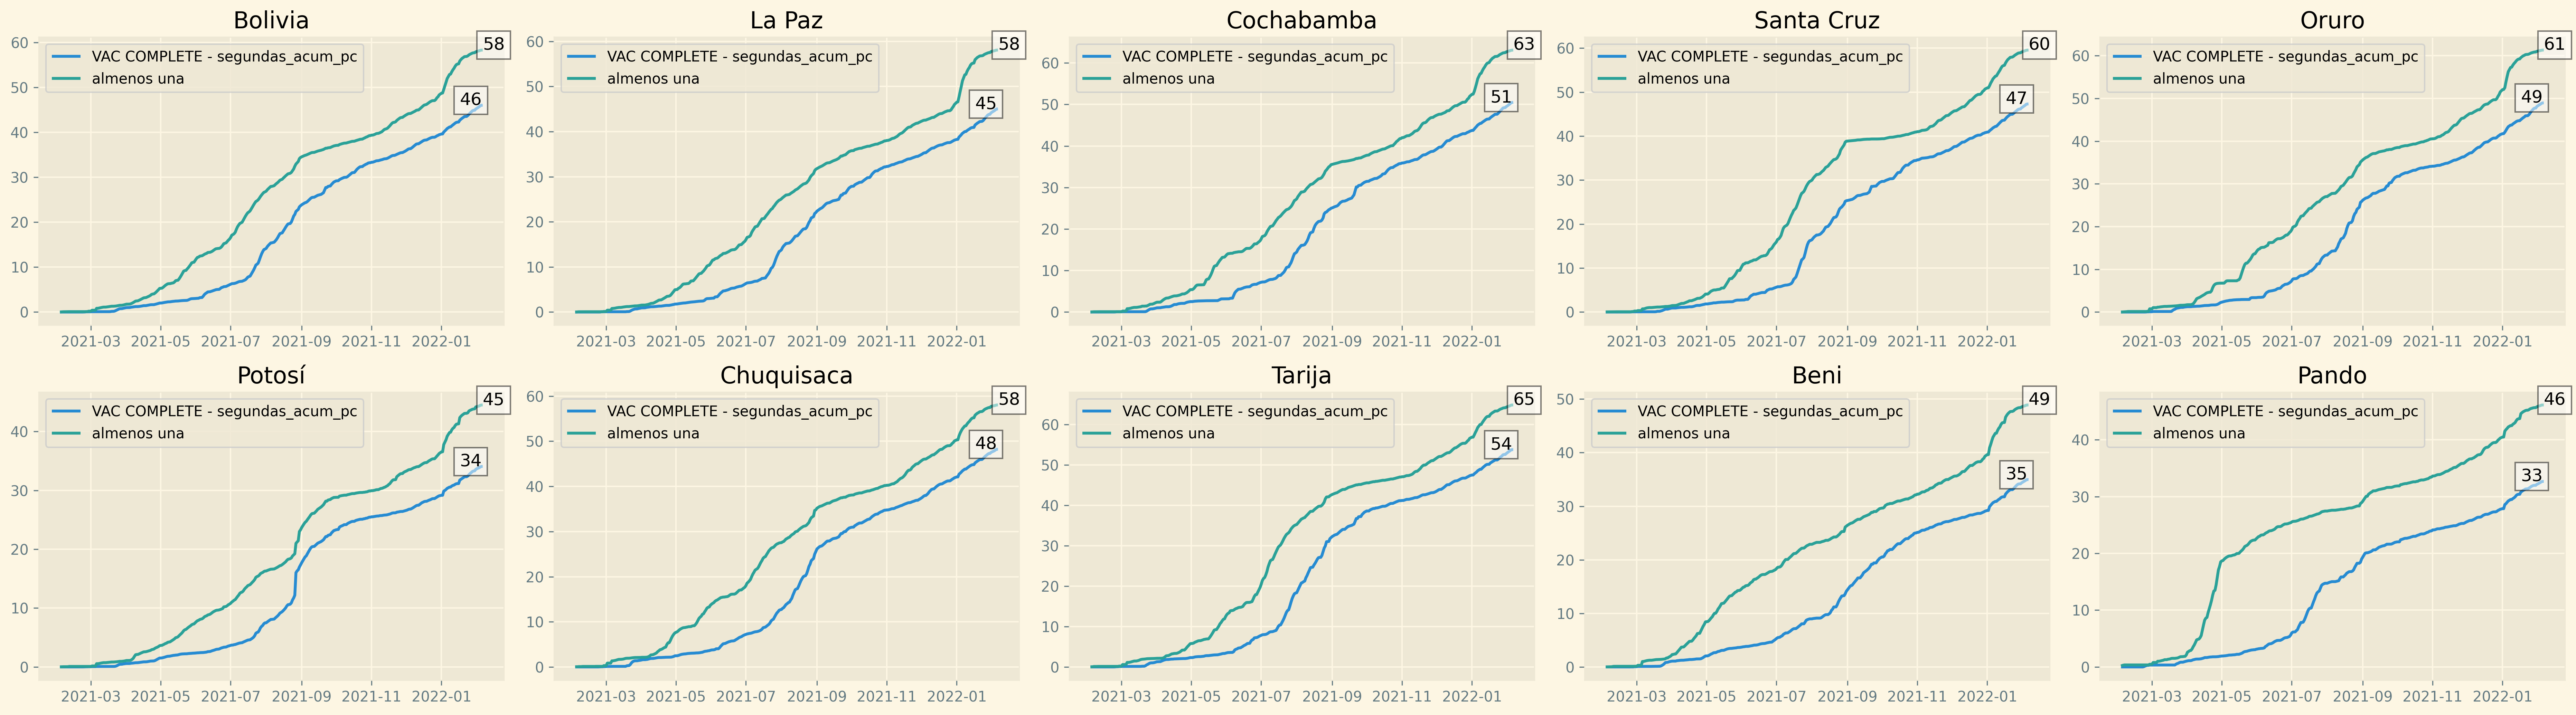

In [34]:
fig, axs = plt.subplots(2,5, figsize=(25,7), dpi=300)
axs = axs.flatten()

for i in range(10):
    axs[i].set_title(segundas_acum_pc.columns[i])
    axs[i].plot(segundas_acum_pc.iloc[:,i], label="VAC COMPLETE - segundas_acum_pc")
    axs[i].plot(almenos_una_pc_acum.iloc[:,i], label="almenos una")
    axs[i].legend()
    annotate_last_flat(almenos_una_pc_acum,i, axis=i,offset_days=0)
    annotate_last_flat(segundas_acum_pc,i, axis=i,offset_days=-20)
    
fig.tight_layout()

## nuevo - sin refuerzo y habilitados

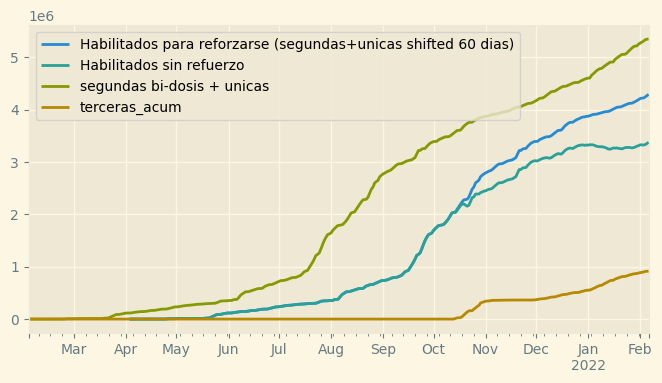

In [35]:
habilitados_refuerzo_acum = segundas_acum.shift(60, freq="D").iloc[:-60,:]
habilitados_refuerzo_acum.Bolivia.plot(label="Habilitados para reforzarse (segundas+unicas shifted 60 dias)")

habilitados_refuerzo_acum_falta = habilitados_refuerzo_acum - terceras_acum
habilitados_refuerzo_acum_falta.Bolivia.plot(label="Habilitados sin refuerzo")

segundas_acum.Bolivia.plot(label="segundas bi-dosis + unicas")
# segundas_acum_alt.Bolivia.plot(label="segundas bi-dosis")
# unicas_acum.Bolivia.plot(label="unicas")
terceras_acum.Bolivia.plot(label="terceras_acum")


# plt.axvline(segundas_acum.index[-60])
# plt.axvline(segundas_acum.index[-1])





plt.legend()

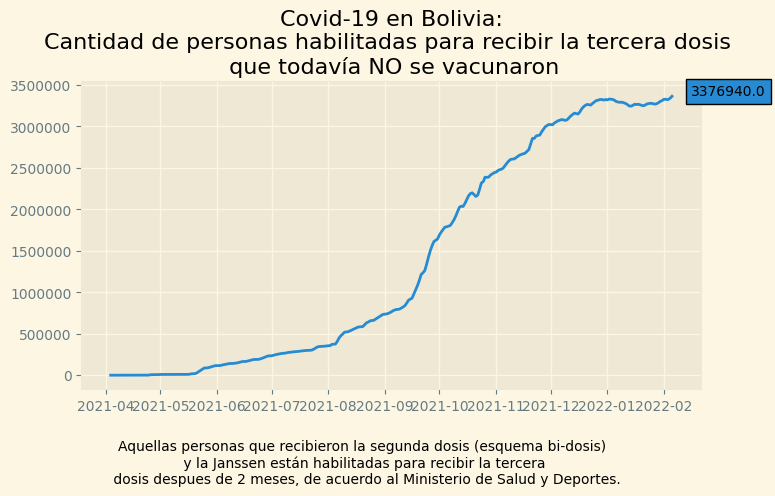

In [36]:
fig, axs = plt.subplots(1,1)
axs.set_title('Covid-19 en Bolivia:\nCantidad de personas habilitadas para recibir la tercera dosis \n que todavía NO se vacunaron')
axs.plot(habilitados_refuerzo_acum_falta.index, habilitados_refuerzo_acum_falta.Bolivia, label="Habilitados sin refuerzo")

axs.text(s = "Aquellas personas que recibieron la segunda dosis (esquema bi-dosis) \n y la Janssen están habilitadas para recibir la tercera \n dosis despues de 2 meses, de acuerdo al Ministerio de Salud y Deportes.", 
        x=habilitados_refuerzo_acum_falta.index[200],
        y=-1300000, ha="center")
axs.get_yaxis().get_major_formatter().set_scientific(False)
axs.annotate(text = habilitados_refuerzo_acum_falta.Bolivia[-1],
             xy=(habilitados_refuerzo_acum_falta.index[-1]+timedelta(days=10),
                 habilitados_refuerzo_acum_falta.Bolivia[-1]),
             bbox={})

fig.savefig("habilitado_refuerzo1.jpg", bbox_inches="tight")

# RESUMEN NACIONAL (archivado, careful with dosis)

In [37]:
# #RESUMEN NACIONAL
# vacunacion_BO_df = pd.concat([primeras_dia.Bolivia,
#                               primeras_acum.Bolivia,
#                               primeras_acum_pc.Bolivia,
#                               segundas_dia.Bolivia,
#                               segundas_acum.Bolivia,
#                               segundas_acum_pc.Bolivia,
#                               todas_dia.Bolivia,
#                               todas_acum.Bolivia,
#                               todas_acum_pc.Bolivia,
#                               terceras_acum.Bolivia,
#                               terceras_dia.Bolivia
#                               ], 
#                              axis=1, 
#                              keys = ["Primeras Dosis Diarias", 
#                                      "Primeras Dosis Acumulado", 
#                                      "Primeras Dosis Acumulado, % poblacion",
#                                      "Segundas y Janssen Diarias",
#                                      "Segundas y Janssen Acumulada", 
#                                      "Segundas y Janssen Acumulado, % Poblacion",
#                                      "Dosis Todas Diarias",
#                                      "Dosis Todas Acumuladas",
#                                      "Terceras acumuladas",
#                                      "Terceras diarias"])

# vacunacion_BO_df.plot()
# vacunacion_BO_df

# Comparación con antiguos datos de BC (archivado)

In [38]:
# primeras_BC
# segundas_BC

# fig, axs = plt.subplots(1,1, figsize=(25,5), dpi=300)

# #plt.rcParams['lines.linestyle'] = '--'
# axs.plot(segundas_acum.diff().Bolivia, label="segundas MF - segundas mas unicas")
# axs.plot(segundas_BC.diff().Bolivia, label="segundas BC - segundas mas unicas")
# # axs.plot(primeras_acum.diff().Bolivia, label="primeras MF")
# # axs.plot(primeras_BC.diff().Bolivia, label="primeras BC")

# axs.legend()

In [39]:
# fig, axs = plt.subplots(1,1, figsize=(25,5), dpi=300)

# # axs.plot(primeras.Bolivia, label="primeras MF")
# # axs.plot(primeras_BC.Bolivia, label="primeras BC")
# axs.plot(primeras_acum.diff().Bolivia, label="primeras MF")
# axs.plot(primeras_BC.diff().Bolivia, label="primeras BC")
# axs.legend()

# Guardar Datos en .CSV (old and new)

In [40]:
##### OLD

# folder=""

# primeras_acum.fillna(0).astype(int).to_csv(directory + folder + "Primeras_Acumuladas.csv")
# primeras_acum_pc.round(2).to_csv(directory + folder + "Primeras_Acumuladas_PorCada100Hab.csv")
# primeras_dia.fillna(0).astype(int).to_csv(directory + folder + "Primeras_Diario.csv")
# primeras_dia_pc.round(2).to_csv(directory + folder + "Primeras_Diario_PorCada100Hab.csv")

# segundas_acum.fillna(0).astype(int).to_csv(directory + folder + "Segundas_Acumuladas.csv")
# segundas_acum_pc.round(2).to_csv(directory + folder + "Segundas_Acumuladas_PorCada100Hab.csv")
# segundas_dia.fillna(0).astype(int).to_csv(directory + folder + "Segundas_Diario.csv")
# segundas_dia_pc.round(2).to_csv(directory + folder + "Segundas_Diario_PorCada100Hab.csv")

# todas_acum.fillna(0).astype(int).to_csv(directory + folder + "Dosis_Todas_Acumuladas.csv")
# todas_acum_pc.round(2).to_csv(directory + folder + "Dosis_Todas_Acumuladas_PorCada100Hab.csv")
# todas_dia.fillna(0).astype(int).to_csv(directory + folder + "Dosis_Todas_Diarias.csv")
# todas_dia_pc.round(2).to_csv(directory + folder + "Dosis_Todas_Diarias_PorCada100Hab.csv")


# vacunacion_BO_df.round(1).to_csv(directory + folder + "Resumen_Nacional_Bolivia_Vacuna.csv")

In [41]:
##### OLD

folder="datos/"

primeras_acum.fillna(0).astype(int).to_csv(directory + folder + "primeras_bidosis_acumulado.csv")
primeras_dia.fillna(0).astype(int).to_csv(directory + folder + "primeras_bidosis_diario.csv")

segundas_acum_alt.fillna(0).astype(int).to_csv(directory + folder + "segundas_bidosis_acumulado.csv")
segundas_dia_alt.fillna(0).astype(int).to_csv(directory + folder + "segundas_bidosis_diario.csv")

unicas_acum.fillna(0).astype(int).to_csv(directory + folder + "unicas_acumulado.csv")
unicas_dia.fillna(0).astype(int).to_csv(directory + folder + "unicas_diario.csv")

terceras_acum.fillna(0).astype(int).to_csv(directory + folder + "dosis_refuerzo1_acumulado.csv")
terceras_dia.fillna(0).astype(int).to_csv(directory + folder + "dosis_refuerzo1_diario.csv")

almenos_una_acum.fillna(0).astype(int).to_csv(directory + folder + "pob_con_almenos_una_acumulado.csv")
almenos_una_pc_acum.fillna(0).astype(int).to_csv(directory + folder + "pob_con_almenos_una_porcentaje.csv")

completa_acum.fillna(0).astype(int).to_csv(directory + folder + "pob_con_vac_completa_acumulado.csv")
completa_pc.fillna(0).astype(int).to_csv(directory + folder + "pob_con_vac_completa_porcentaje.csv")

###

todas_acum.fillna(0).astype(int).to_csv(directory + folder + "dosis_todas_acumulado.csv")



## Ultima Actualización string

In [42]:
ultima_actualizacion = "última actualización: {}".format(primeras_acum.index[-1].date())
ultima_actualizacion

'última actualización: 2022-02-06'

# Gráficas


findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.


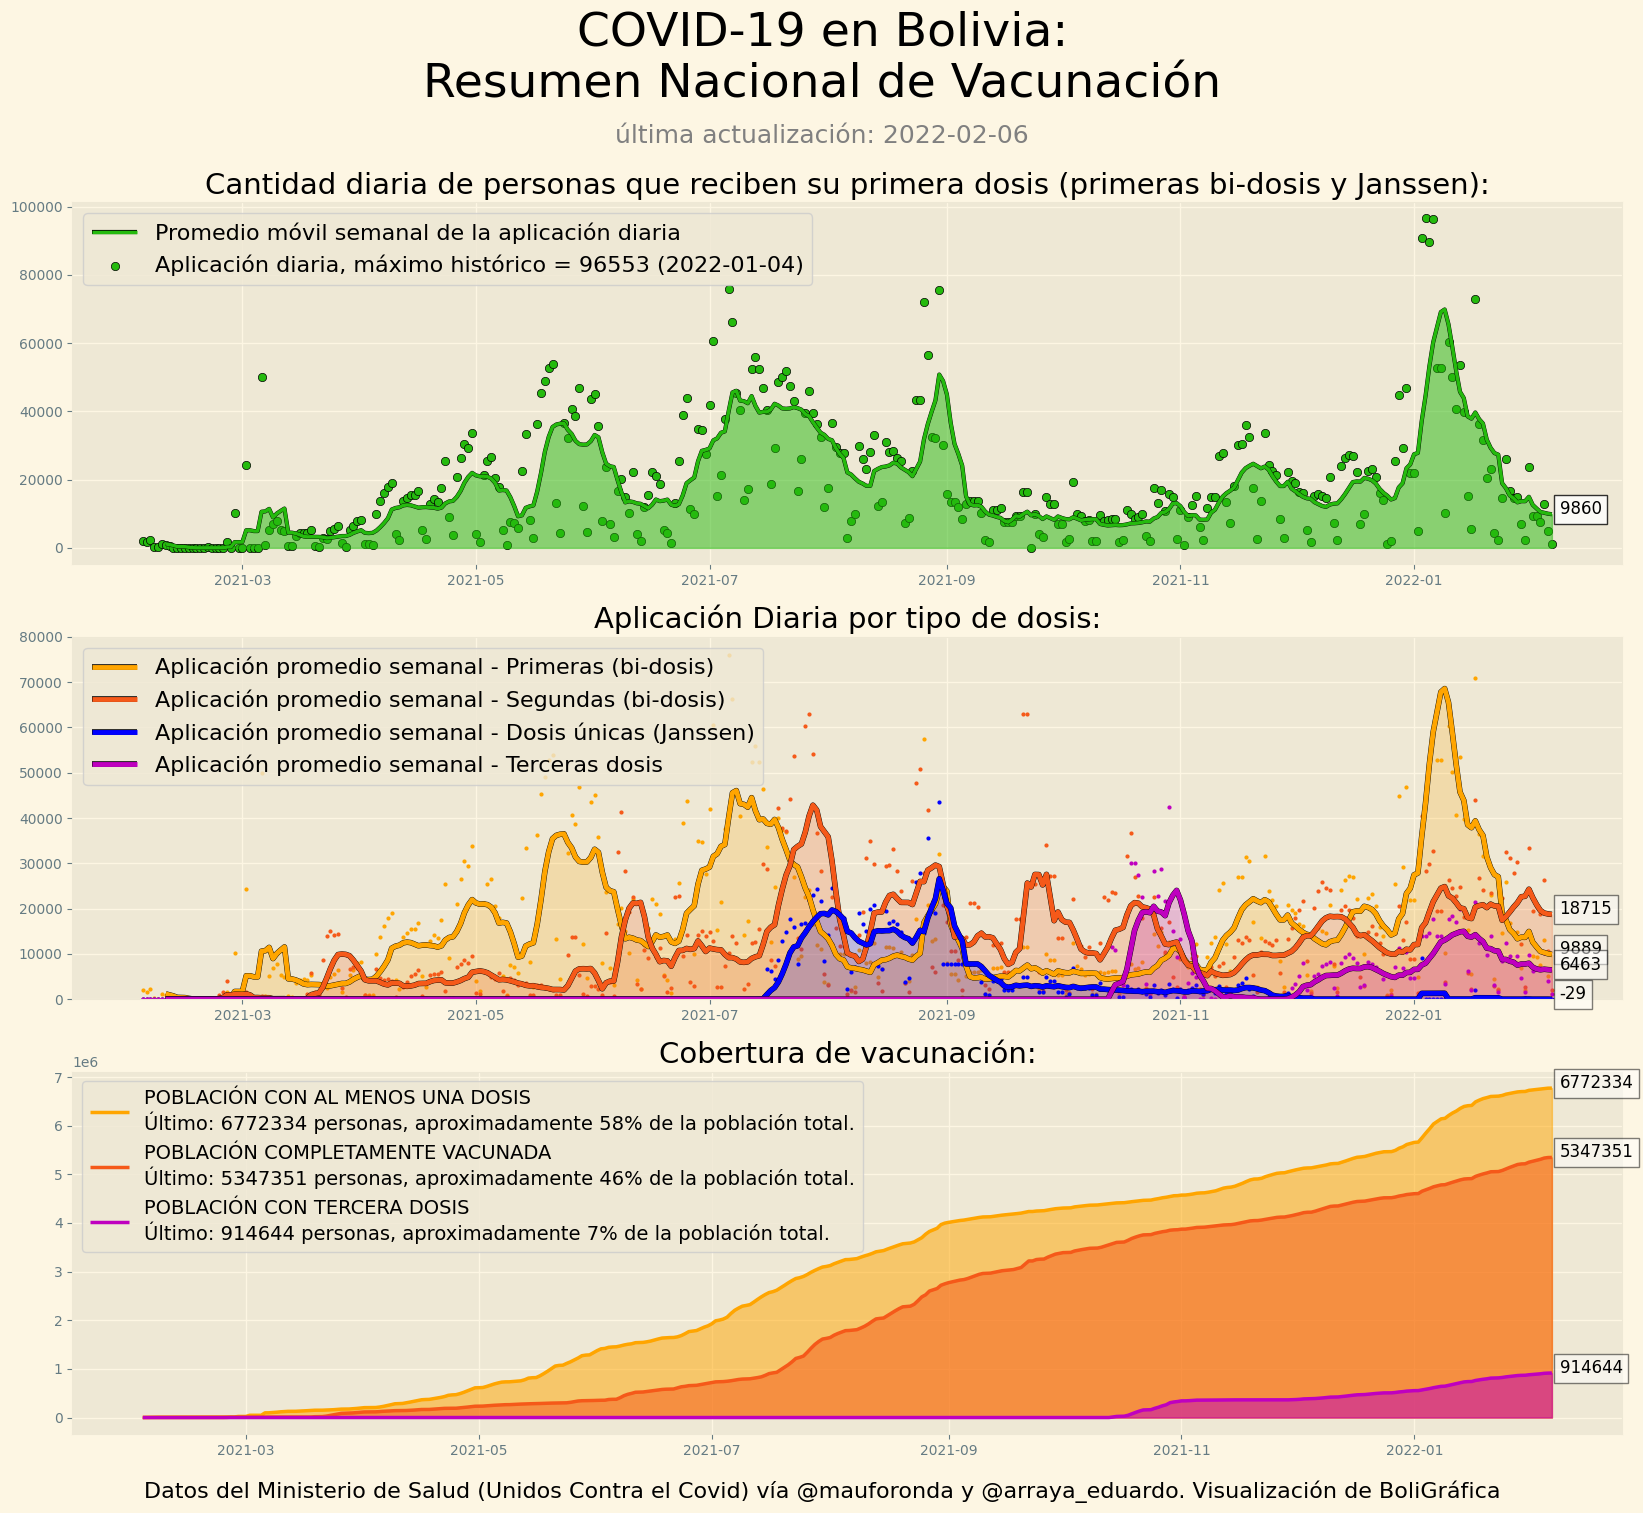

In [43]:
fig, axs = plt.subplots(3,1, sharex=False,
                        figsize=(20,16),
                        dpi=100
                        )

axs = axs.flatten()

fig.suptitle("COVID-19 en Bolivia:\nResumen Nacional de Vacunación", fontsize = 34, y=1)
fig.text(0.5,.917,horizontalalignment='center',s=ultima_actualizacion, fontsize=18, color="grey")
fig.text(0.5,0.07,horizontalalignment='center',s=atribucion, fontsize=16)
# fig.set_facecolor(background_color1)


#axs[0].grid(zorder=0)
axs[0].set_title("Cantidad diaria de personas que reciben su primera dosis (primeras bi-dosis y Janssen):", fontsize=21)
axs[0].scatter(primera_vez.index, primera_vez.Bolivia, color="#25ba0e", label="Aplicación diaria, máximo histórico = {} ({})".format(primera_vez.Bolivia.fillna(0).astype(int).max(), primera_vez.Bolivia.idxmax().date()), edgecolors='black', linewidth=.5) 
axs[0].plot(primera_vez.index, primera_vez.Bolivia.rolling(7).mean(), color="#25ba0e",label="Promedio móvil semanal de la aplicación diaria", linewidth=2.5, path_effects=[pe.Stroke(linewidth=3, foreground='black'), pe.Normal()])
axs[0].fill_between(primera_vez.Bolivia.index, primera_vez.Bolivia.rolling(7).mean(), color="#25ba0e", alpha=.5)
axs[0].legend(fontsize=16)
annotate_last_flat(df=primera_vez.rolling(7).mean().fillna(0).astype(int), column_index=0, axis = 0, offset_days=2, alpha=.8)


#axs[1].grid(zorder=0)
axs[1].set_title("Aplicación Diaria por tipo de dosis:", fontsize=21)
axs[1].scatter(primeras_dia.index, primeras_dia.Bolivia, color=color_vac_parcial1, s = 4) 
axs[1].plot(primeras_dia.index, primeras_dia.Bolivia.interpolate().rolling(7).mean(), color=color_vac_parcial2, label="Aplicación promedio semanal - Primeras (bi-dosis)", linewidth=3.5, path_effects=[pe.Stroke(linewidth=4, foreground='black'), pe.Normal()])
axs[1].fill_between(primeras_dia.Bolivia.index, primeras_dia.Bolivia.rolling(7).mean(), color=color_vac_parcial2, alpha=.2)
annotate_last_flat(df=primeras_dia.rolling(7).mean().round().fillna(0).astype(int), column_index=0, axis = 1, offset_days=2, alpha=.5)

axs[1].scatter(segundas_dia_alt.index, segundas_dia_alt.Bolivia, color=color_vac_completa1, s = 4) 
axs[1].plot(segundas_dia_alt.index, segundas_dia_alt.Bolivia.interpolate().rolling(7).mean(), color=color_vac_completa2,label="Aplicación promedio semanal - Segundas (bi-dosis)", linewidth=3.5, path_effects=[pe.Stroke(linewidth=4, foreground='black'), pe.Normal()])
axs[1].fill_between(segundas_dia_alt.Bolivia.index, segundas_dia_alt.Bolivia.rolling(7).mean(), color=color_vac_completa2, alpha=.2)
axs[1].legend(fontsize=16, loc="upper left")
annotate_last_flat(df=segundas_dia_alt.rolling(7).mean().round().fillna(0).astype(int), column_index=0, axis = 1, offset_days=2, alpha=.5)

axs[1].scatter(unicas_dia.index, unicas_dia.Bolivia, color=color3, s = 4) 
axs[1].plot(unicas_dia.index, unicas_dia.Bolivia.interpolate().rolling(7).mean(), color=color3,label="Aplicación promedio semanal - Dosis únicas (Janssen)", linewidth=3.5, path_effects=[pe.Stroke(linewidth=4, foreground='black'), pe.Normal()])
axs[1].fill_between(unicas_dia.Bolivia.index, unicas_dia.Bolivia.rolling(7).mean(), color=color3, alpha=.2)
axs[1].legend(fontsize=16, loc="upper left")
annotate_last_flat(df=unicas_dia.rolling(7).mean().round().fillna(0).astype(int), column_index=0, axis = 1, offset_days=2, alpha=.5)

axs[1].scatter(terceras_dia.index, terceras_dia.Bolivia, color=color_terceras, s = 4) 
axs[1].plot(terceras_dia.index, terceras_dia.Bolivia.interpolate().rolling(7).mean(), color=color_terceras,label="Aplicación promedio semanal - Terceras dosis", linewidth=3.5, path_effects=[pe.Stroke(linewidth=4, foreground='black'), pe.Normal()])
axs[1].fill_between(terceras_dia.Bolivia.index, terceras_dia.Bolivia.rolling(7).mean(), color=color_terceras, alpha=.2)
axs[1].legend(fontsize=16, loc="upper left")
annotate_last_flat(df=terceras_dia.rolling(7).mean().round().fillna(0).astype(int), column_index=0, axis = 1, offset_days=2, alpha=.5)

axs[1].set_ylim(0,80000)

 
#axs[2].grid(zorder=1)
axs[2].set_title("Cobertura de vacunación:", fontsize=21)
axs[2].plot(almenos_una_acum.Bolivia.interpolate(), color=color_vac_parcial2, linewidth=2.5, 
            label="POBLACIÓN CON AL MENOS UNA DOSIS\nÚltimo: {} personas, aproximadamente {}% de la población total.".format(almenos_una_acum.Bolivia[-1].astype(int),almenos_una_pc_acum.Bolivia[-1].astype(int)))
axs[2].fill_between(almenos_una_acum.Bolivia.index, almenos_una_acum.Bolivia.interpolate(), color=color_vac_parcial1, alpha=.5)

annotate_last_flat(df=almenos_una_acum.fillna(0).astype(int), column_index=0, axis = 2, offset_days=2, alpha=.5,
                   #end_text="{} segundas dosis y Janssen aplicadas, lo cual cubre \n aproximadamente el {}% de la población total".format(segundas_acum.Bolivia[-1],segundas_acum_pc.Bolivia[-1].round())
                   )

axs[2].plot(segundas_acum.Bolivia.interpolate(), color=color_vac_completa2,linewidth=2.5, 
            label="POBLACIÓN COMPLETAMENTE VACUNADA \nÚltimo: {} personas, aproximadamente {}% de la población total.".format(segundas_acum.Bolivia[-1].astype(int),segundas_acum_pc.Bolivia[-1].astype(int)))
axs[2].fill_between(segundas_acum.Bolivia.index, segundas_acum.Bolivia.interpolate(), color=color_vac_completa1, alpha=.5)
axs[2].legend(fontsize=16)
annotate_last_flat(df=segundas_acum.fillna(0).astype(int), column_index=0, axis = 2, offset_days=2, alpha=.5,
                    #end_text=" segundas dosis y Janssen aplicadas, lo cual cubre \n aproximadamente el {}% de la población total".format(segundas_acum_pc.Bolivia[-1].round())
                    )

axs[2].plot(terceras_acum.Bolivia.interpolate(), color=color_terceras,linewidth=2.5, 
            label="POBLACIÓN CON TERCERA DOSIS \nÚltimo: {} personas, aproximadamente {}% de la población total.".format(terceras_acum.Bolivia[-1].astype(int),terceras_acum_pc.Bolivia[-1].astype(int)))
axs[2].fill_between(terceras_acum.Bolivia.index, terceras_acum.Bolivia.interpolate(), color=color_terceras, alpha=.5)
axs[2].legend(fontsize=14)
annotate_last_flat(df=terceras_acum.fillna(0).astype(int), column_index=0, axis = 2, offset_days=2, alpha=.5,
                    #end_text=" segundas dosis y Janssen aplicadas, lo cual cubre \n aproximadamente el {}% de la población total".format(segundas_acum_pc.Bolivia[-1].round())
                    )

fig.savefig(directory + "resumen_nacional.jpg", bbox_inches="tight")

findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.


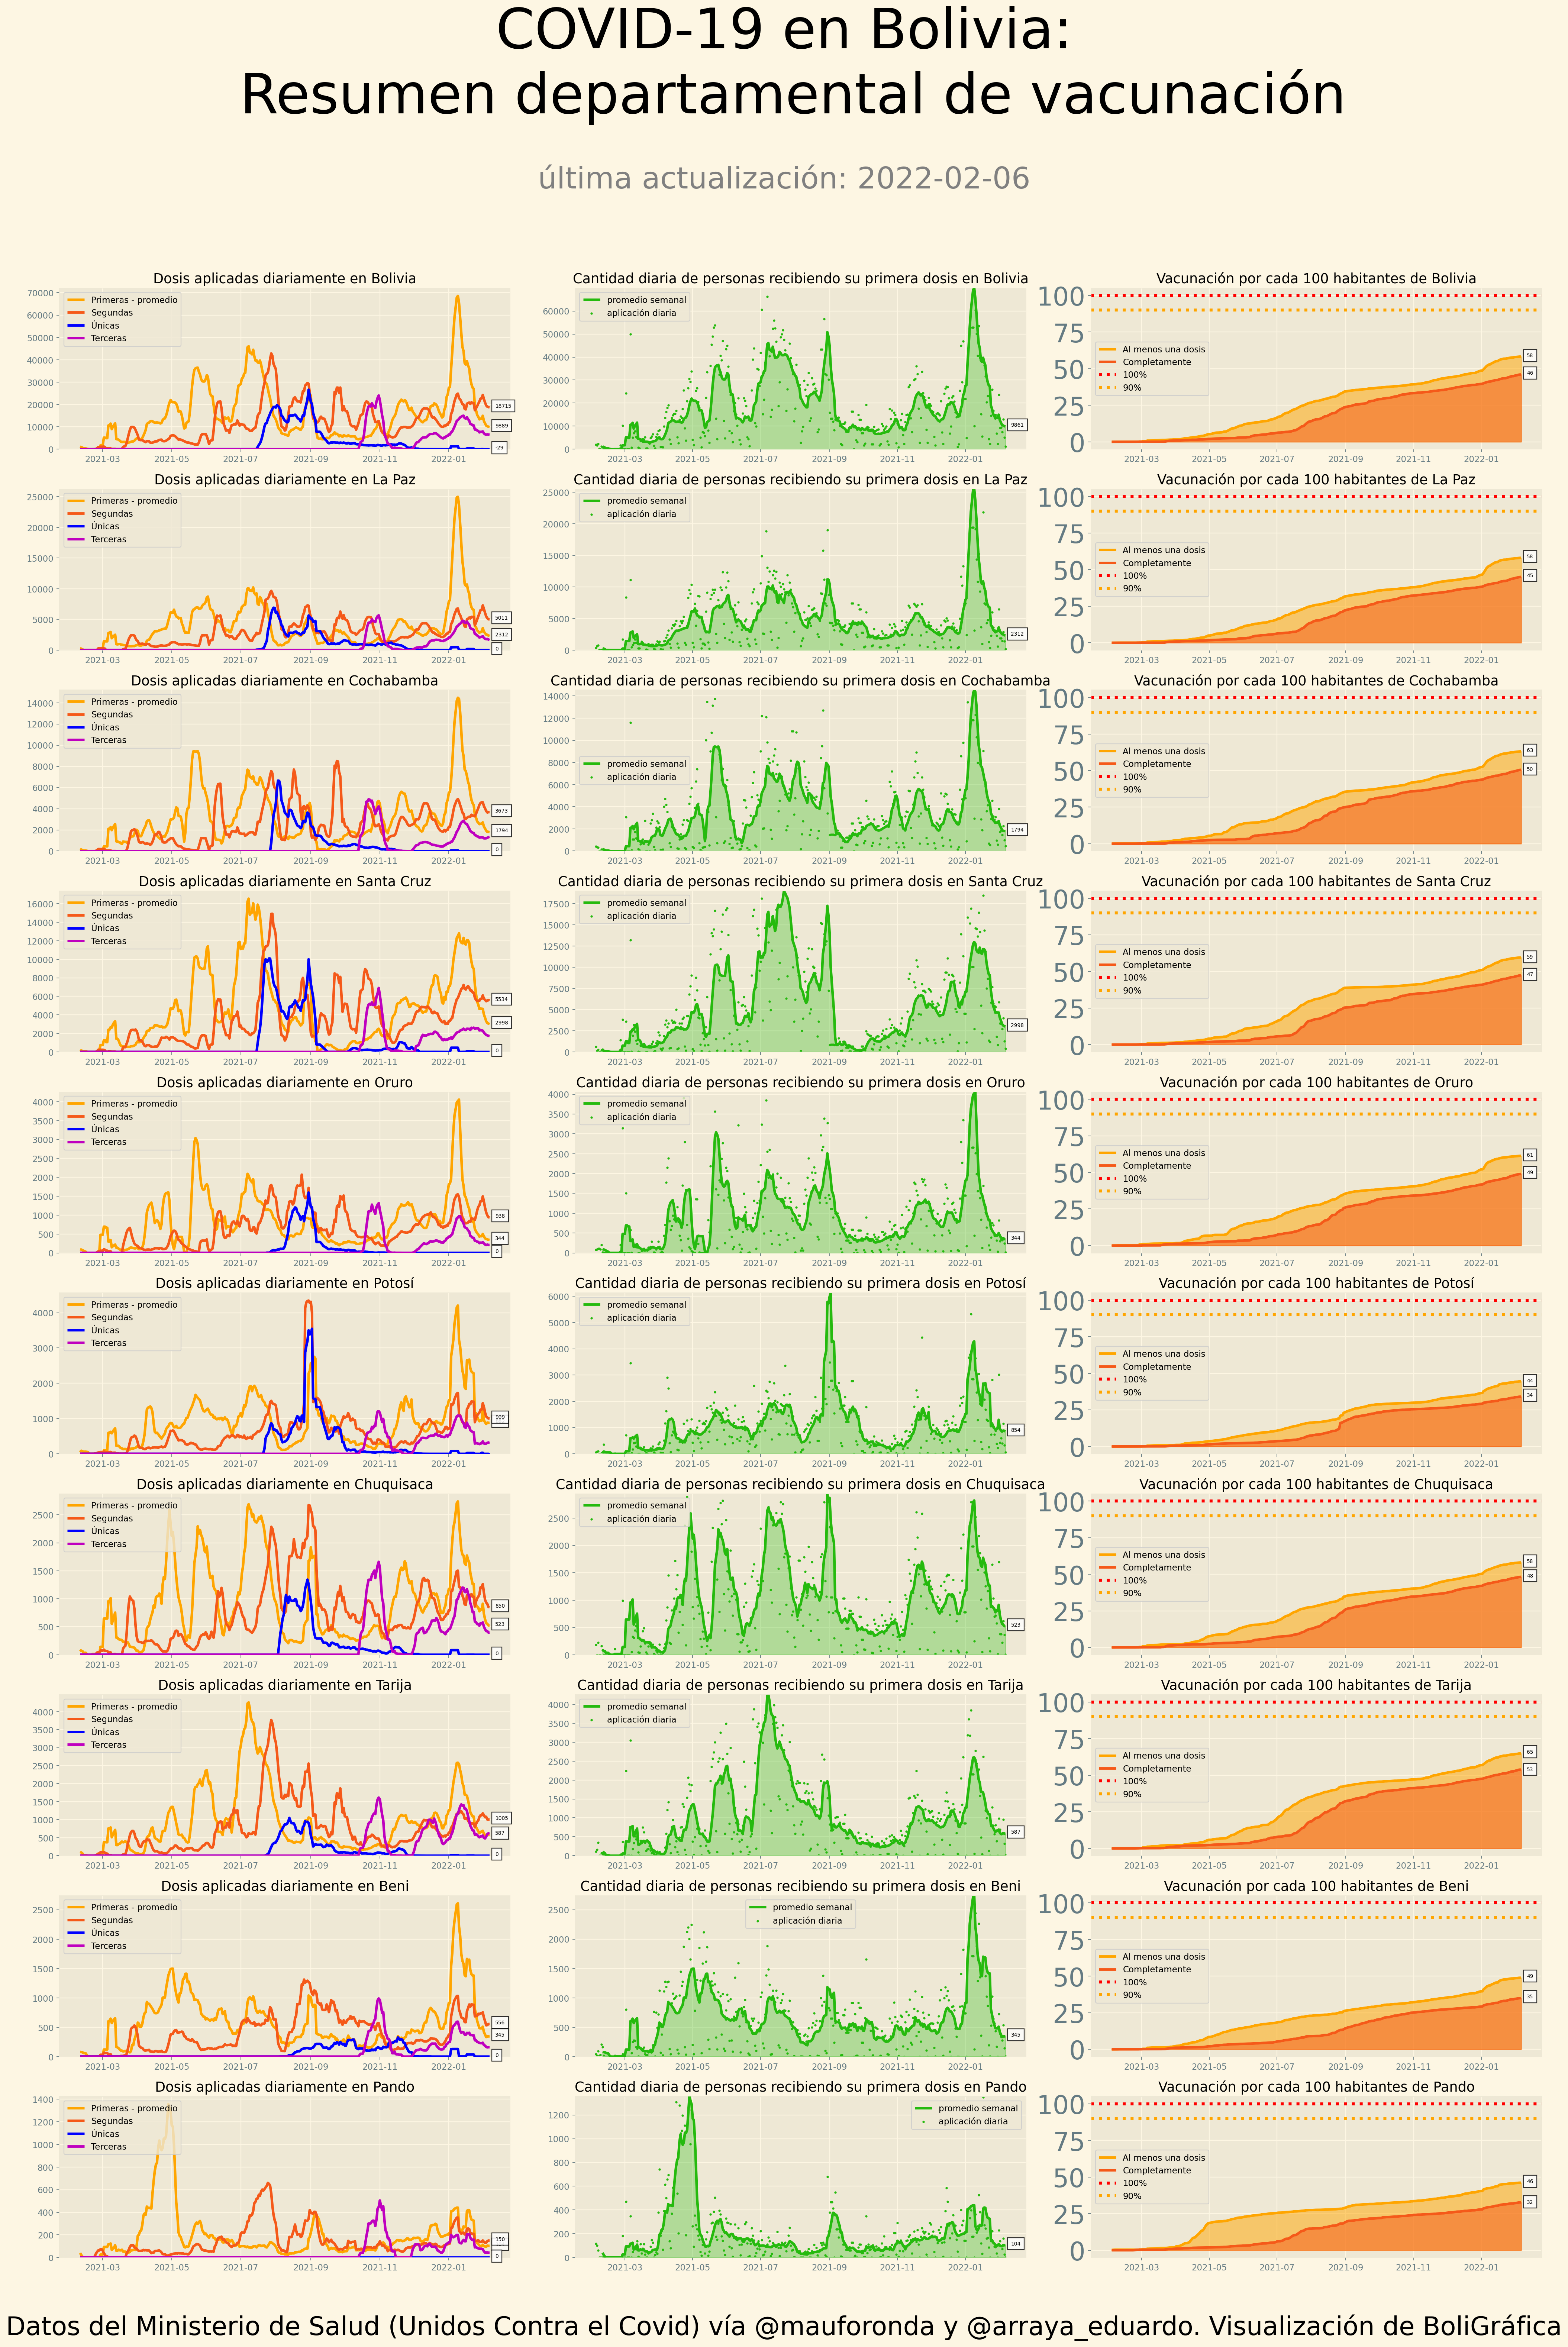

In [44]:
fig, axs = plt.subplots(10,3, figsize = (25,35),
                        dpi = 165
                        )
#axs = axs.flatten()
fig.suptitle("COVID-19 en Bolivia:\n Resumen departamental de vacunación", y=1.06, fontsize = 65)
fig.text(0.5,.975,horizontalalignment='center',s=ultima_actualizacion, fontsize=35, color='grey')
fig.text(0.5,-.025,horizontalalignment='center',s=atribucion, fontsize=30)

# fig.set_facecolor(background_color1)



for i in range(10):
  #axs[i,0].grid(zorder=1)
  axs[i,0].set_title("Dosis aplicadas diariamente en {}".format(primeras_dia.columns[i]))
  # axs[i,0].scatter(primeras_dia.index, primeras_dia.iloc[:,i], color = color_vac_parcial1, s=3, zorder=2)
  axs[i,0].plot(primeras_dia.index, primeras_dia.iloc[:,i].interpolate().rolling(7).mean(),color = color_vac_parcial2, label="Primeras - promedio", linewidth = 3, zorder=3)
  # axs[i,0].scatter(segundas_dia_alt.index, segundas_dia_alt.iloc[:,i], color = color_vac_completa1, s=3, zorder=2)
  axs[i,0].plot(segundas_dia_alt.index, segundas_dia_alt.iloc[:,i].interpolate().rolling(7).mean(),color = color_vac_completa2, label="Segundas", linewidth = 3, zorder=3)  
  
  # axs[i,0].scatter(unicas_dia.index, unicas_dia.iloc[:,i], color = color3, s=3, zorder=2)
  axs[i,0].plot(unicas_dia.index, unicas_dia.iloc[:,i].interpolate().rolling(7).mean(),color = color3, label="Únicas", linewidth = 3, zorder=3)  

  # axs[i,0].scatter(terceras_dia.index, terceras_dia.iloc[:,i], color = color_terceras, s=3, zorder=2)
  axs[i,0].plot(terceras_dia.index, terceras_dia.iloc[:,i].interpolate().rolling(7).mean(),color = color_terceras, label="Terceras", linewidth = 3, zorder=3)  
  
  axs[i,0].legend(loc="upper left")
  axs[i,0].legend(loc="upper left")
  annotate_last_nonflat(primeras_dia.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,0), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)
  annotate_last_nonflat(segundas_dia_alt.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,0), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)
  annotate_last_nonflat(unicas_dia.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,0), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)
  axs[i,0].set_ylim(bottom=0)


for i in range(10):
 # axs[i,1].grid(zorder=1)
  axs[i,1].set_title("Cantidad diaria de personas recibiendo su primera dosis en {}".format(primeras_dia.columns[i]))
  axs[i,1].scatter(primera_vez.index, primera_vez.iloc[:,i], color = "#25ba0e", label="aplicación diaria", s=3, zorder=2)
  axs[i,1].plot(primera_vez.index, primera_vez.iloc[:,i].interpolate().rolling(7).mean(),color = "#25ba0e", label="promedio semanal", linewidth = 3, zorder=3)
  axs[i,1].fill_between(primera_vez.index, primera_vez.iloc[:,i].interpolate().rolling(7).mean(),color = "#25ba0e", zorder=3, alpha=.3)
  axs[i,1].legend()
  annotate_last_nonflat(primera_vez.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,1), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)
  axs[i,1].set_ylim(bottom=0, top = primera_vez.iloc[:,i].interpolate().rolling(7).mean().max())



for i in range(10):
  #axs[i,3].grid(zorder=1)
  axs[i,2].set_title("Vacunación por cada 100 habitantes de {}".format(primeras_dia.columns[i]))
  axs[i,2].plot(almenos_una_pc_acum.iloc[:,i].interpolate(), label = "Al menos una dosis", color= color_vac_parcial2, linewidth = 3, zorder=2)
  axs[i,2].fill_between(almenos_una_pc_acum.index, almenos_una_pc_acum.iloc[:,i].interpolate(),color= color_vac_parcial1,zorder=2, alpha=.5)
  axs[i,2].plot(segundas_acum_pc.iloc[:,i].interpolate(), label = "Completamente",color= color_vac_completa2, linewidth = 3, zorder=3)
  axs[i,2].fill_between(segundas_acum_pc.index, segundas_acum_pc.iloc[:,i].interpolate(),color= color_vac_completa1, zorder=3, alpha=.5)
  axs[i,2].axhline(y=100, color='red', linestyle='dotted',label="100%", linewidth=3.5)
  axs[i,2].axhline(y=90, color='orange', linestyle='dotted',label="90%", linewidth=3.5)
  axs[i,2].legend(loc= "center left")
  axs[i,2].set_yticks([0,25,50,75,100])
  axs[i,2].set_yticklabels([0,25,50,75,100],fontsize=30)
  annotate_last_nonflat(almenos_una_pc_acum.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,2), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)
  annotate_last_nonflat(segundas_acum_pc.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,2), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)

fig.tight_layout()

fig.savefig(directory + "resumen_detallado.jpg", bbox_inches="tight")

findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.


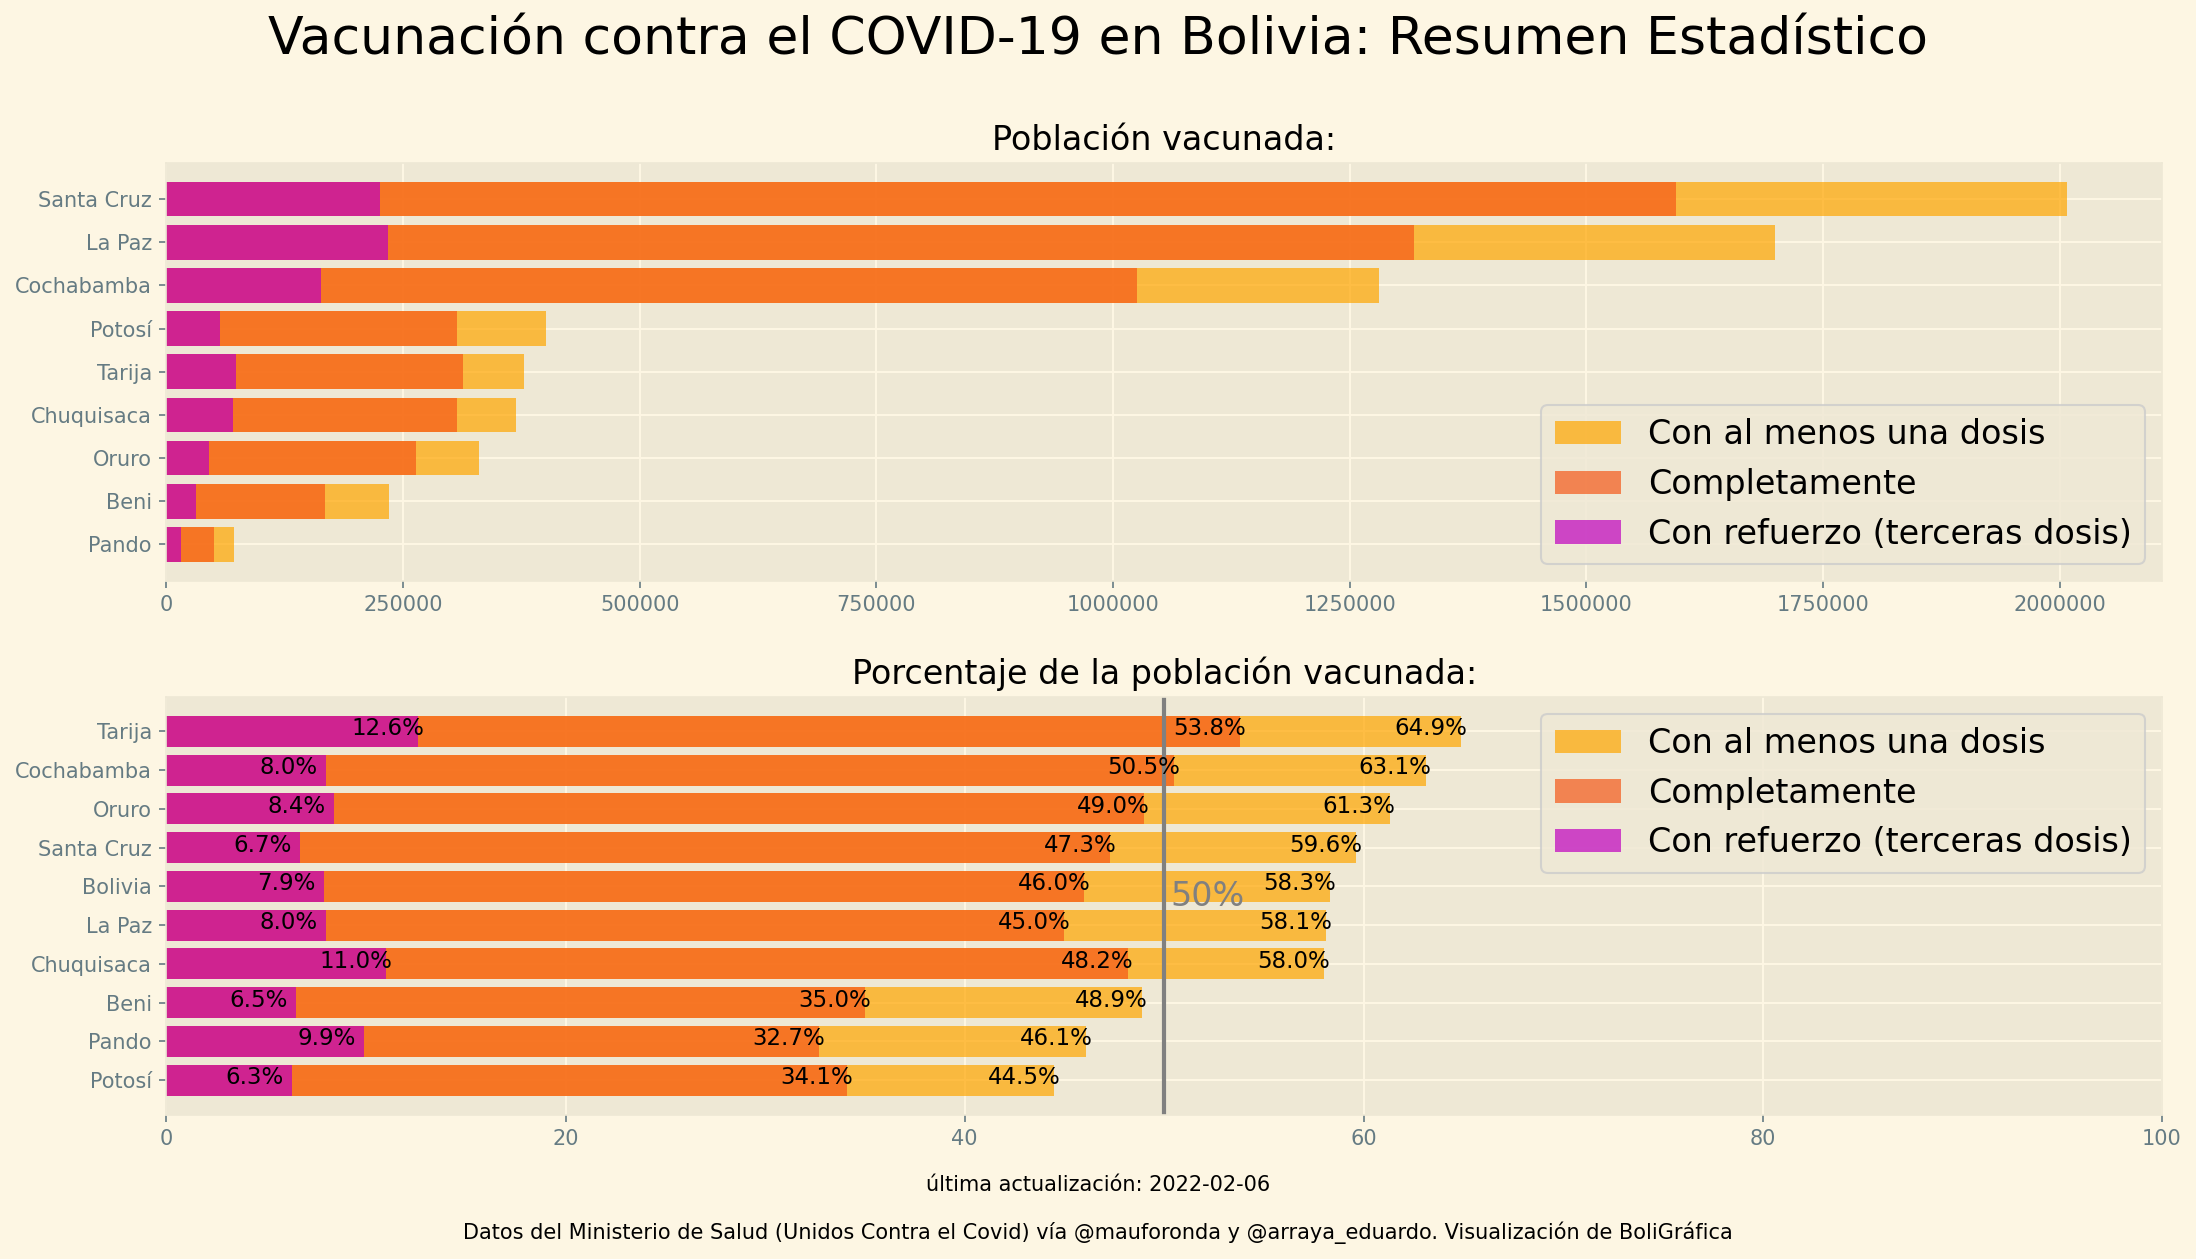

In [45]:
fig, axs = plt.subplots(2,1, figsize=(15,8),dpi=150)
axs=axs.flatten()

fig.suptitle("Vacunación contra el COVID-19 en Bolivia: Resumen Estadístico", fontsize=25)
fig.text(0.5,.0,horizontalalignment='center',s=ultima_actualizacion)
fig.text(0.5,-.04,horizontalalignment='center',s=atribucion, fontsize=10)

# fig.set_facecolor(background_color1)

sort_primeras = almenos_una_acum.iloc[-1,1:10].sort_values(ascending=True).fillna(0).astype(int)
sort_segundas = segundas_acum.iloc[-1,1:10].sort_values(ascending=True).fillna(0).astype(int)
sort_terceras = terceras_acum.iloc[-1,1:10].sort_values(ascending=True).fillna(0).astype(int)

axs[0].grid(zorder=1)
axs[0].set_title("Población vacunada:", fontsize=16)
axs[0].barh(sort_primeras.index, sort_primeras, label="Con al menos una dosis", color=color_vac_parcial2, alpha=.7)
axs[0].barh(sort_segundas.index, sort_segundas, label="Completamente", color=color_vac_completa2, alpha=.7)
axs[0].barh(sort_terceras.index, sort_terceras, label="Con refuerzo (terceras dosis)", color=color_terceras, alpha=.7)
axs[0].legend(fontsize=16)
axs[0].get_xaxis().get_major_formatter().set_scientific(False)
# annotate_bar(bar1,0, fontsize=8, y_offset=.3, x_offset=-35000, alpha=0)



sort_primeras = almenos_una_pc_acum.iloc[-1,:].sort_values(ascending=True).round(1)
sort_segundas = segundas_acum_pc.iloc[-1,:].sort_values(ascending=True).round(1)
sort_terceras = terceras_acum_pc.iloc[-1,:].sort_values(ascending=True).round(1)

axs[1].grid(zorder=1)
axs[1].set_title("Porcentaje de la población vacunada:", fontsize=16)
axs[1].barh(sort_primeras.index, sort_primeras, label="Con al menos una dosis", color=color_vac_parcial2, alpha=.7)
axs[1].barh(sort_segundas.index, sort_segundas, label="Completamente", color=color_vac_completa2, alpha=.7)
axs[1].barh(sort_terceras.index, sort_terceras, label="Con refuerzo (terceras dosis)", color=color_terceras, alpha=.7)
axs[1].legend(fontsize=16)
axs[1].set_xlim(0,100)
annotate_bar(sort_primeras,1, fontsize=11, y_offset=.3, x_offset=-3.35, alpha=0, end_text="%")

axs[1].axvline(50, color="grey")
axs[1].text(50.3,4.5,"50%", color="grey", fontsize=16)
# axs[1].axvspan(xmin=80, xmax=100, color="cyan", alpha=.25)
# axs[1].annotate("Posible inmunidad de rebaño",
#                xy=(81,0.3), rotation=45, fontsize=15, bbox={"facecolor":"w", "alpha":.3})

fig.tight_layout(pad=2)
fig.savefig(directory + "resumen_departamental.jpg", bbox_inches="tight")

findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.


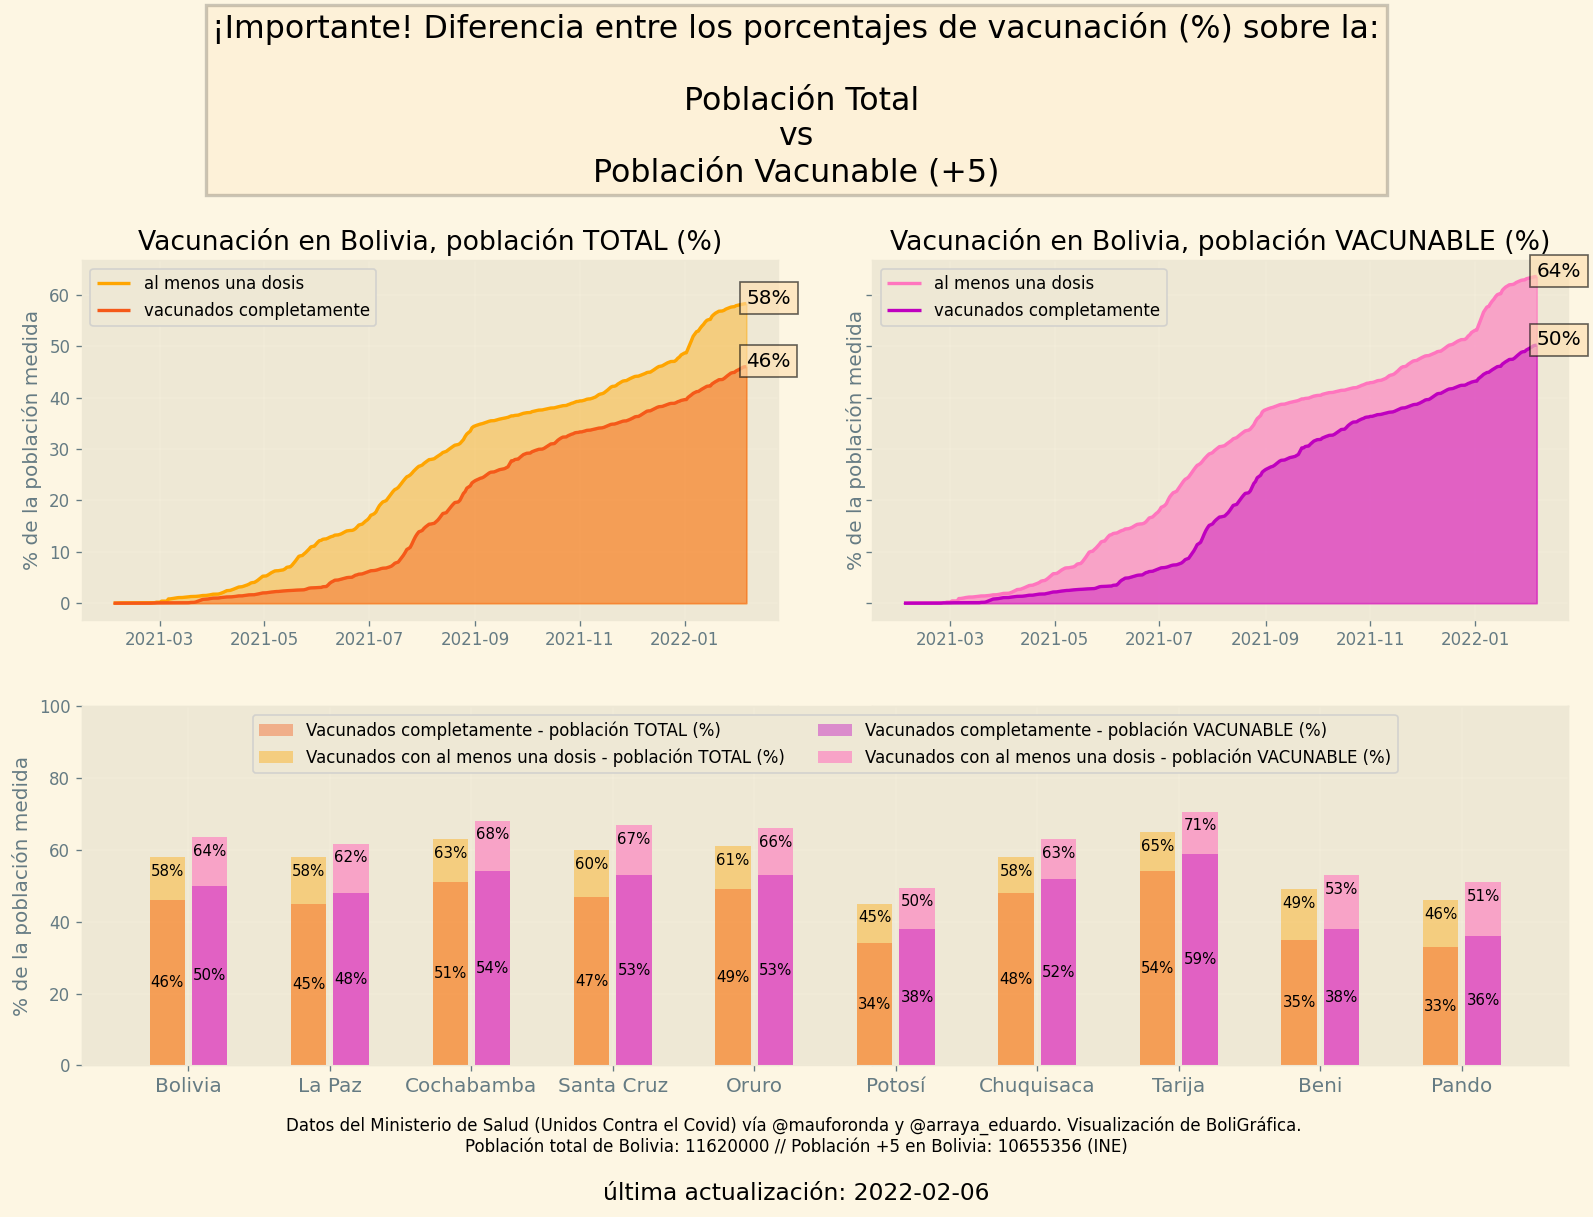

In [46]:
fig, axs = plt.subplots(2,2,figsize=(14,10), sharey=True, dpi=120)
axs = axs.flatten()

fig.suptitle("¡Importante! Diferencia entre los porcentajes de vacunación (%) sobre la:\n\n Población Total\nvs\nPoblación Vacunable (+5)", fontsize=19, y=.95,
    bbox={"facecolor":"navajowhite", "alpha":.2, "edgecolor":"black",'linewidth': 2})

# color4= col_vac_almenos
color3 = "#ff75be"
# color3= col_vac_comp
color4= "m"

axs[0].set_title("Vacunación en Bolivia, población TOTAL (%)")
axs[0].grid(alpha=.2)
axs[0].plot(almenos_una_pc_acum.Bolivia, label="al menos una dosis", color=color_vac_parcial2)
axs[0].plot(completa_pc.Bolivia, label="vacunados completamente", color = color_vac_completa2)
axs[0].fill_between(almenos_una_pc_acum.index, almenos_una_pc_acum.Bolivia, color=color_vac_parcial2, alpha=.4)
axs[0].fill_between(completa_pc.index, completa_pc.Bolivia, color = color_vac_completa2, alpha=.4,)
axs[0].set_ylabel("% de la población medida")
axs[0].legend()

axs[1].set_title("Vacunación en Bolivia, población VACUNABLE (%)")
axs[1].grid(alpha=.2)
axs[1].plot(almenos_una_vacunable_acum.Bolivia, label="al menos una dosis", color = color3)
axs[1].plot(completa_vacunable_acum.Bolivia, label="vacunados completamente", color = color4)
axs[1].fill_between(almenos_una_vacunable_acum.index, almenos_una_vacunable_acum.Bolivia, color = color3, alpha=.6,)
axs[1].fill_between(completa_vacunable_acum.index, completa_vacunable_acum.Bolivia, color = color4, alpha=.4,)
axs[1].set_ylabel("% de la población medida")
axs[1].legend()

axs[2].get_xaxis().set_visible(False)
axs[3].get_xaxis().set_visible(False)
axs[2].get_yaxis().set_visible(False)
axs[3].get_yaxis().set_visible(False)


x=list(range(10))
width=.25
b=.15
x1 = [i + b for i in x]
x2 = [i - b  for i in x]

axs[3] = fig.add_subplot(212)
axs[3].set_title("", fontsize=18)
axs[3].grid(alpha=.2)

# sorted = almenos_una_pc_acum.iloc[-1,:].sort_values(ascending=False)
# emptybar = axs[3].bar(sorted, [0,0,0,0,0,0,0,0,0,0])
bar1 = axs[3].bar(x2,completa_pc.iloc[-1,:].round(0).astype(int), alpha=.4, width = width, label="Vacunados completamente - población TOTAL (%)", zorder=3, color=color_vac_completa2)
bar2 = axs[3].bar(x2,almenos_una_pc_acum.iloc[-1,:].round(0).astype(int), alpha=.4,width = width, label="Vacunados con al menos una dosis - población TOTAL (%)", zorder=2, color=color_vac_parcial2)
bar3 = axs[3].bar(x1,completa_vacunable_acum.iloc[-1,:].round(0).astype(int), alpha=.4,width = width, label="Vacunados completamente - población VACUNABLE (%)", zorder=3, color = color4)
bar4 = axs[3].bar(x1,almenos_una_vacunable_acum.iloc[-1,:].round(1).astype(float), alpha=.6,width = width, label="Vacunados con al menos una dosis - población VACUNABLE (%)", zorder=2, color = color3)

annotate_last_flat(completa_pc,0, end_text="%", alpha=.6, facecolor
                   ="navajowhite")
annotate_last_flat(almenos_una_pc_acum,0, end_text="%", alpha=.6, facecolor="navajowhite")
annotate_last_flat(completa_vacunable_acum,0, axis=1, end_text="%", alpha=.6, facecolor="navajowhite")
annotate_last_flat(almenos_una_vacunable_acum,0, axis=1, end_text="%", alpha=.6, facecolor="navajowhite")

axs[3].bar_label(bar1, color="black", label_type="center", fontsize=9, fmt='%.0f%%')
axs[3].bar_label(bar2, color="black", padding=-13, fontsize=9, fmt='%.0f%%')
axs[3].bar_label(bar3, color="black", label_type="center", fontsize=9, fmt='%.0f%%')
axs[3].bar_label(bar4, color="black", padding=-13, fontsize=9, fmt='%.0f%%')


axs[3].set_xticks(x)
axs[3].set_xticklabels(completa_pc.columns, fontsize=12)
axs[3].set_ylim(0,100)
axs[3].set_ylabel("% de la población medida")
axs[3].legend(loc = "upper center", ncol=2)

fig.text(0.5,-.04,horizontalalignment='center',s=ultima_actualizacion, fontsize=14)
fig.text(0.5,0.0,horizontalalignment='center',s=atribucion+ ". \nPoblación total de Bolivia: 11620000 // Población +5 en Bolivia: 10655356 (INE)", fontsize=10)

fig.tight_layout(pad=3)

fig.savefig(directory + "total_vs_vacunable.jpg", bbox_inches="tight")

findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.


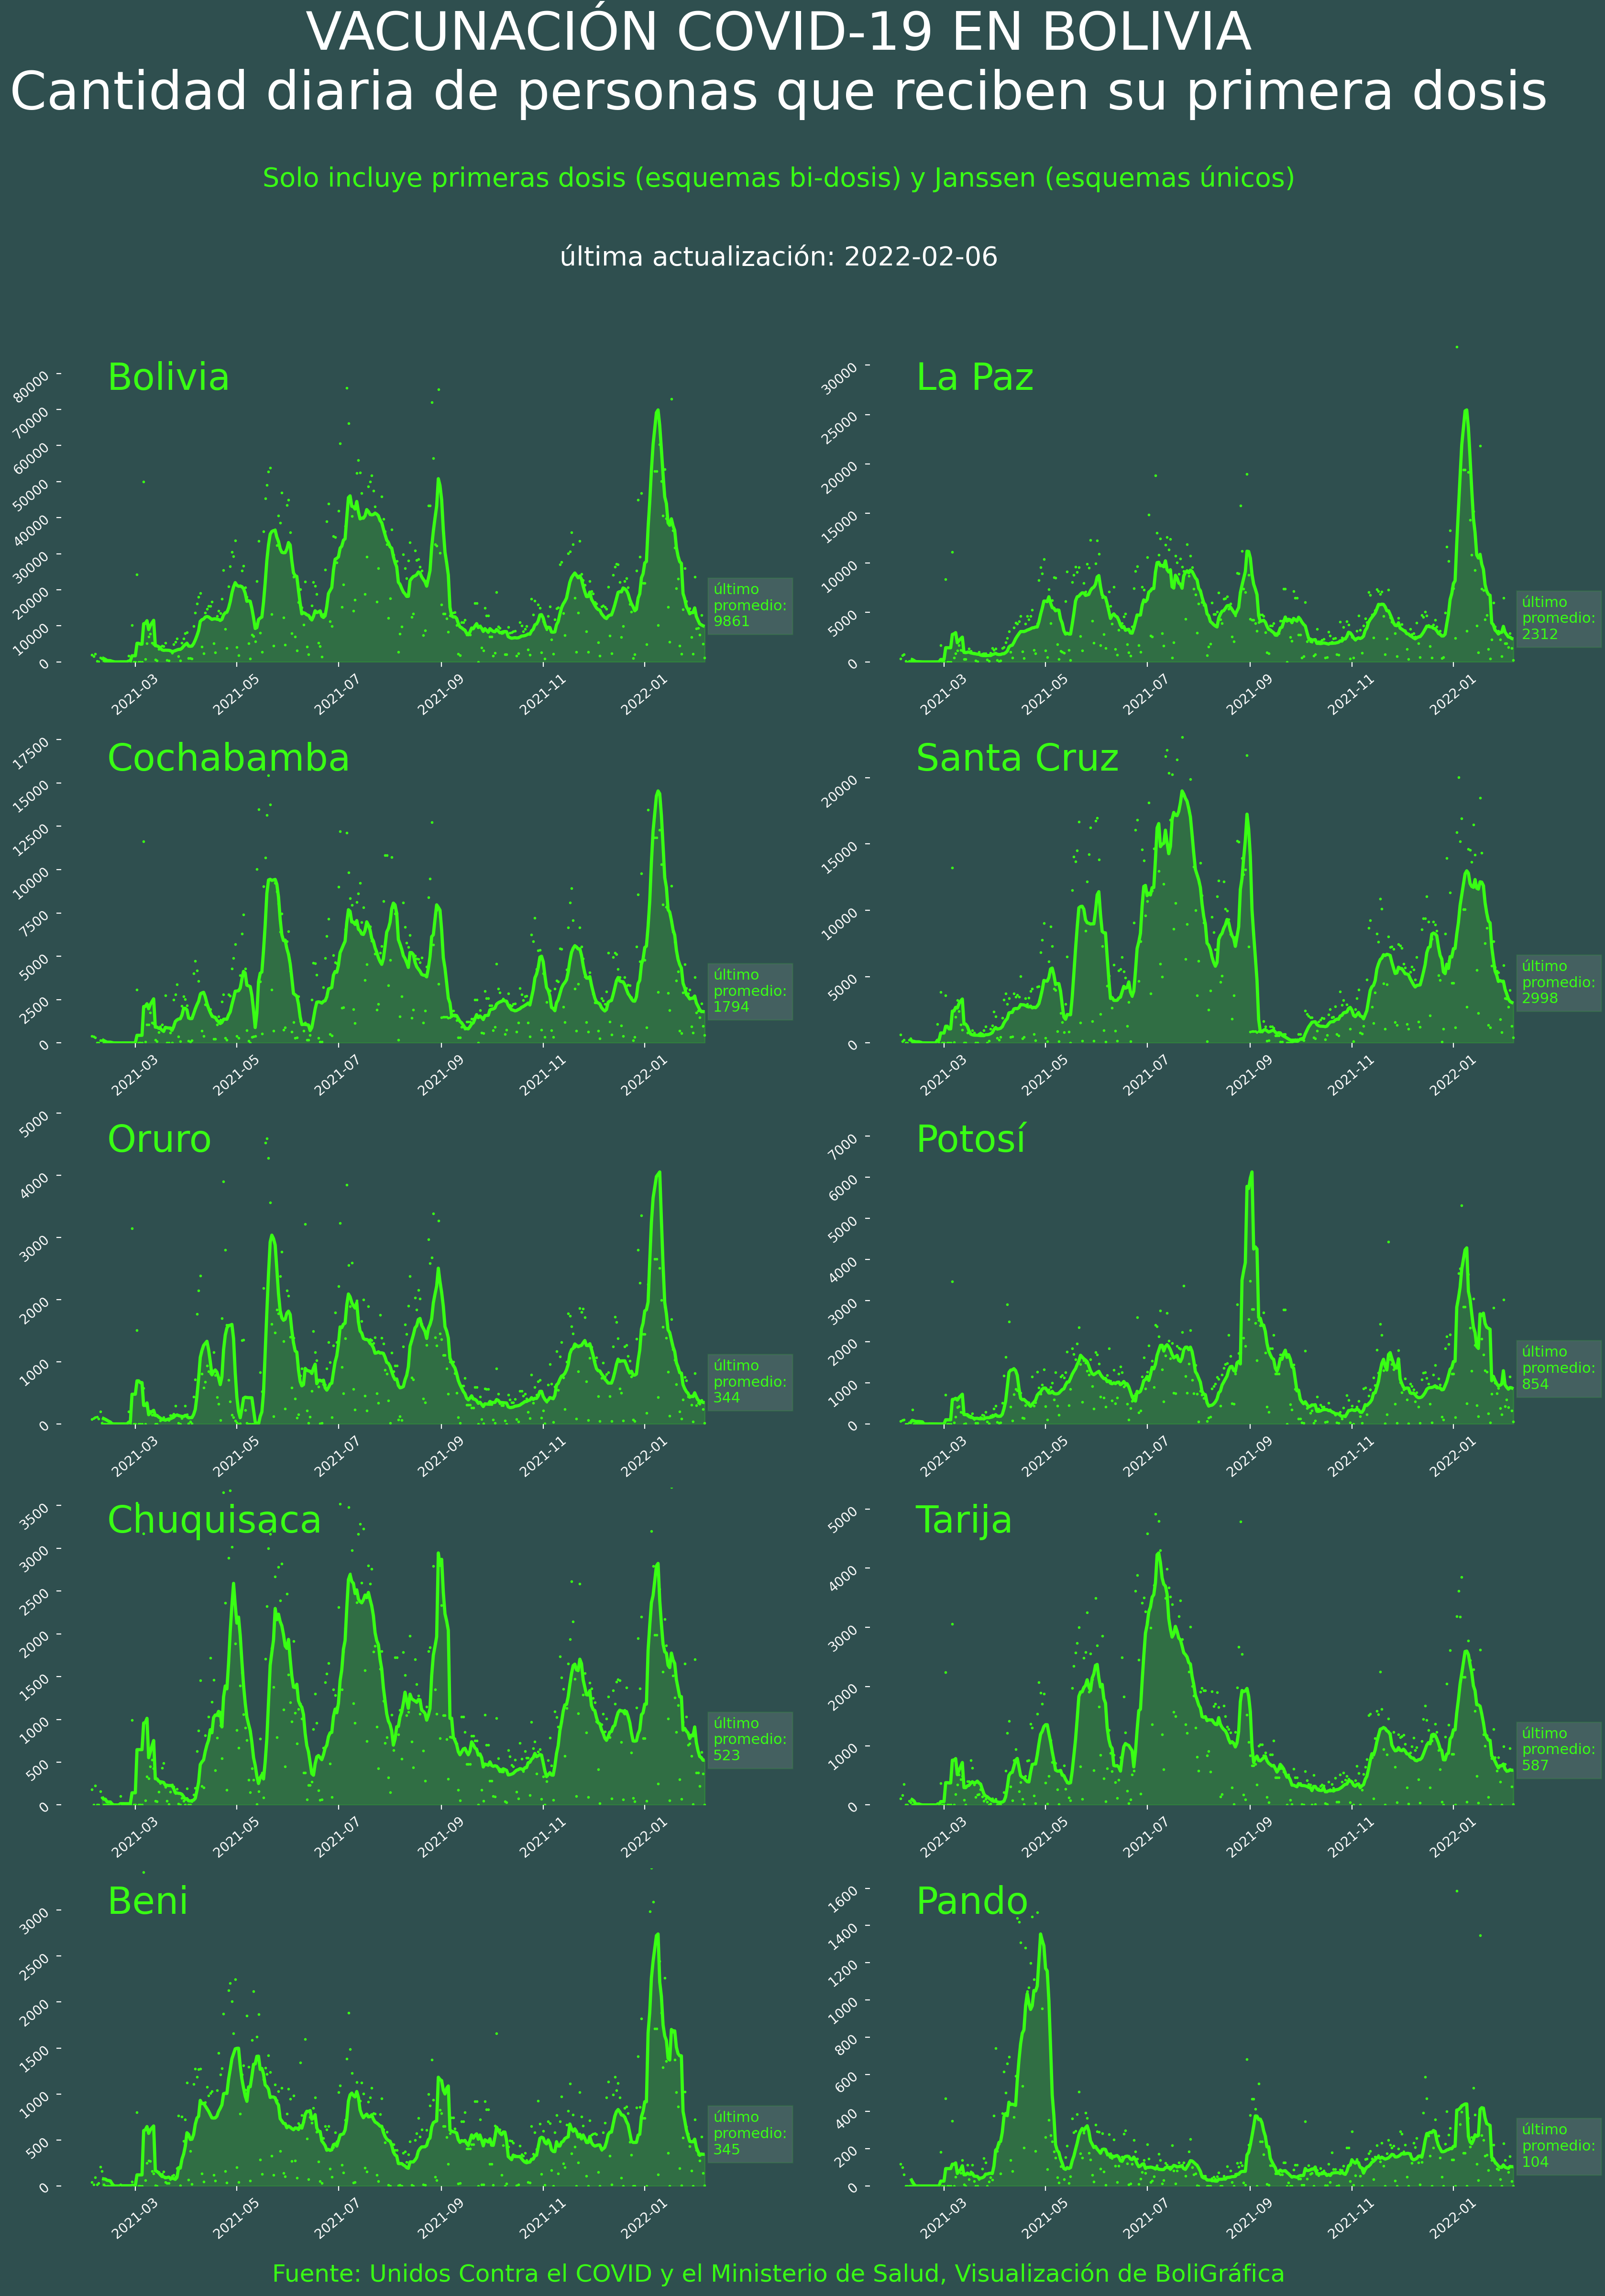

In [47]:
fig, axs = plt.subplots(5,2,figsize=(20,25), dpi=200)
axs = axs.flatten()

fig.suptitle("VACUNACIÓN COVID-19 EN BOLIVIA\nCantidad diaria de personas que reciben su primera dosis", fontsize=40, y = 1.02, color="white")
fig.text(s="Solo incluye primeras dosis (esquemas bi-dosis) y Janssen (esquemas únicos)",
         x=.5,y=.946, ha="center",
         fontsize=20, color="#39FF14")
fig.text(s=ultima_actualizacion,
         x=.5,y=.913, ha="center",
         fontsize=20, color="white")
fig.text(s="Fuente: Unidos Contra el COVID y el Ministerio de Salud, Visualización de BoliGráfica",
         x=.5, y=0.07, ha="center", fontsize=18, color="#39FF14")

fig.set_facecolor("darkslategray")

start = 0

for i in range(10):
    axs[i].set_facecolor("darkslategray")
    axs[i].grid(color="darkslategray")

    axs[i].scatter(primera_vez.index[start:],primera_vez.iloc[start:,i], color="#39FF14", s=1)
    axs[i].plot(primera_vez.index[start:],primera_vez.iloc[start:,i].rolling(7).mean(), color="#39FF14", linewidth=2.4)
    axs[i].fill_between(primera_vez.index[start:],primera_vez.iloc[start:,i].rolling(7).mean(), color="#39FF14", alpha=.18)
    axs[i].text(s=primera_vez.columns[i],
               x=primera_vez.index[start+ 10] ,y=primera_vez.iloc[start:,i].rolling(7).mean().max()*1.08, color="#39FF14", fontsize=28)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['left'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['bottom'].set_visible(False)
    axs[i].tick_params(labelcolor="w", color="w", rotation=40)
    annotate_last_nonflat(primera_vez.rolling(7).mean().round().fillna(0).astype(int), i, axis=i, start_text="último\npromedio:\n", text_color="#39FF14", fontsize=11, offset_days=5, edgecolor="#39FF14", facecolor="white", alpha=0.1)


    
    axs[i].set_ylim(0, primera_vez.iloc[start:,i].rolling(7).mean().max()*1.26)
    
fig.savefig(directory + "primera_vacunacion.jpg", bbox_inches="tight")

# graficas archivadas

In [48]:
# fig, axs = plt.subplots(3,1, sharex=False,
#                         figsize=(20,16),
#                         dpi=100
#                         )

# axs = axs.flatten()

# fig.suptitle("BOLIVIA: Resumen Nacional de Vacunación contra el COVID-19", fontsize = 24, y=.95)
# fig.text(0.5,.91,horizontalalignment='center',s=ultima_actualizacion)
# fig.text(0.5,0.08,horizontalalignment='center',s=atribucion, fontsize=16)
# # fig.set_facecolor(background_color1)


# #axs[0].grid(zorder=0)
# axs[0].set_title("Aplicación Diaria de todas las dosis:", fontsize=18)
# axs[0].scatter(todas_dia.index, todas_dia.Bolivia, color=color_total_dosis1, label="Aplicación diaria, máximo histórico = {} ({})".format(todas_dia.Bolivia.fillna(0).astype(int).max(), todas_dia.Bolivia.idxmax().date()), edgecolors='black', linewidth=.5) 
# axs[0].plot(todas_dia.index, todas_dia.Bolivia.rolling(7).mean(), color=color_total_dosis2,label="Promedio móvil semanal de la aplicación diaria", linewidth=5)
# axs[0].fill_between(todas_dia.Bolivia.index, todas_dia.Bolivia.rolling(7).mean(), color=color_total_dosis2, alpha=.5)
# axs[0].legend(fontsize=16)
# annotate_last_flat(df=todas_dia.rolling(7).mean().fillna(0).astype(int), column_index=0, axis = 0, offset_days=2, alpha=.8)


# #axs[1].grid(zorder=0)
# axs[1].set_title("Aplicación Diaria por tipo de dosis:", fontsize=18)
# axs[1].scatter(primeras_dia.index, primeras_dia.Bolivia, color=color_vac_parcial1, s = 4) 
# axs[1].plot(primeras_dia.index, primeras_dia.Bolivia.interpolate().rolling(7).mean(), color=color_vac_parcial2, label="Aplicación promedio semanal - Primeras (bi-dosis)", linewidth=2.5)
# axs[1].fill_between(primeras_dia.Bolivia.index, primeras_dia.Bolivia.rolling(7).mean(), color=color_vac_parcial2, alpha=.3)
# annotate_last_flat(df=primeras_dia.rolling(7).mean().round().fillna(0).astype(int), column_index=0, axis = 1, offset_days=2, alpha=.5)

# axs[1].scatter(segundas_dia_alt.index, segundas_dia_alt.Bolivia, color=color_vac_completa1, s = 4) 
# axs[1].plot(segundas_dia_alt.index, segundas_dia_alt.Bolivia.interpolate().rolling(7).mean(), color=color_vac_completa2,label="Aplicación promedio semanal - Segundas (bi-dosis)", linewidth=2.5)
# axs[1].fill_between(segundas_dia_alt.Bolivia.index, segundas_dia_alt.Bolivia.rolling(7).mean(), color=color_vac_completa2, alpha=.3)
# axs[1].legend(fontsize=16, loc="upper left")
# annotate_last_flat(df=segundas_dia_alt.rolling(7).mean().round().fillna(0).astype(int), column_index=0, axis = 1, offset_days=2, alpha=.5)

# axs[1].scatter(unicas_dia.index, unicas_dia.Bolivia, color=color3, s = 4) 
# axs[1].plot(unicas_dia.index, unicas_dia.Bolivia.interpolate().rolling(7).mean(), color=color3,label="Aplicación promedio semanal - Dosis únicas (Janssen)", linewidth=2.5)
# axs[1].fill_between(unicas_dia.Bolivia.index, unicas_dia.Bolivia.rolling(7).mean(), color=color3, alpha=.3)
# axs[1].legend(fontsize=16, loc="upper left")
# annotate_last_flat(df=unicas_dia.rolling(7).mean().round().fillna(0).astype(int), column_index=0, axis = 1, offset_days=2, alpha=.5)

# axs[1].scatter(terceras_dia.index, terceras_dia.Bolivia, color=color3, s = 4) 
# axs[1].plot(terceras_dia.index, terceras_dia.Bolivia.interpolate().rolling(7).mean(), color=color_terceras,label="Aplicación promedio semanal - Terceras dosis", linewidth=2.5)
# axs[1].fill_between(terceras_dia.Bolivia.index, terceras_dia.Bolivia.rolling(7).mean(), color=color_terceras, alpha=.3)
# axs[1].legend(fontsize=16, loc="upper left")
# annotate_last_flat(df=terceras_dia.rolling(7).mean().round().fillna(0).astype(int), column_index=0, axis = 1, offset_days=2, alpha=.5)

# axs[1].set_ylim(0,50000)


# #axs[2].grid(zorder=1)
# axs[2].set_title("Total de vacunas aplicadas sobre la población TOTAL de Bolivia:", fontsize=18)
# axs[2].plot(almenos_una_acum.Bolivia.interpolate(), color=color_vac_parcial2, linewidth=2.5, 
#             label="POBLACIÓN CON AL MENOS UNA DOSIS\nÚltimo: {} personas, aproximadamente {}% de la población total.\n".format(almenos_una_acum.Bolivia[-1].astype(int),almenos_una_pc_acum.Bolivia[-1].astype(int)))
# axs[2].fill_between(almenos_una_acum.Bolivia.index, almenos_una_acum.Bolivia.interpolate(), color=color_vac_parcial1, alpha=.5)

# annotate_last_flat(df=almenos_una_acum.fillna(0).astype(int), column_index=0, axis = 2, offset_days=2, alpha=.5,
#                    #end_text="{} segundas dosis y Janssen aplicadas, lo cual cubre \n aproximadamente el {}% de la población total".format(segundas_acum.Bolivia[-1],segundas_acum_pc.Bolivia[-1].round())
#                    )

# axs[2].plot(segundas_acum.Bolivia.interpolate(), color=color_vac_completa2,linewidth=2.5, 
#             label="POBLACIÓN COMPLETAMENTE VACUNADA \nÚltimo: {} personas, aproximadamente {}% de la población total.\n".format(segundas_acum.Bolivia[-1].astype(int),segundas_acum_pc.Bolivia[-1].astype(int)))
# axs[2].fill_between(segundas_acum.Bolivia.index, segundas_acum.Bolivia.interpolate(), color=color_vac_completa1, alpha=.5)
# axs[2].legend(fontsize=16)
# annotate_last_flat(df=segundas_acum.fillna(0).astype(int), column_index=0, axis = 2, offset_days=2, alpha=.5,
#                     #end_text=" segundas dosis y Janssen aplicadas, lo cual cubre \n aproximadamente el {}% de la población total".format(segundas_acum_pc.Bolivia[-1].round())
#                     )

# axs[2].plot(terceras_acum.Bolivia.interpolate(), color=color_terceras,linewidth=2.5, 
#             label="POBLACIÓN CON TERCERA DOSIS \nÚltimo: {} personas, aproximadamente {}% de la población total.".format(terceras_acum.Bolivia[-1].astype(int),terceras_acum_pc.Bolivia[-1].astype(int)))
# axs[2].fill_between(terceras_acum.Bolivia.index, terceras_acum.Bolivia.interpolate(), color=color_terceras, alpha=.5)
# axs[2].legend(fontsize=16)
# annotate_last_flat(df=terceras_acum.fillna(0).astype(int), column_index=0, axis = 2, offset_days=2, alpha=.5,
#                     #end_text=" segundas dosis y Janssen aplicadas, lo cual cubre \n aproximadamente el {}% de la población total".format(segundas_acum_pc.Bolivia[-1].round())
#                     )

# fig.savefig(directory + "resumen_nacional.jpg", bbox_inches="tight")

In [49]:
# fig, axs = plt.subplots(10,4, figsize = (25,30),
#                         dpi = 165
#                         )
# #axs = axs.flatten()
# fig.suptitle("Resumen departamental de la vacunación contra el COVID-19 en Bolivia", y=1.03, fontsize = 34)
# fig.text(0.5,-.01,horizontalalignment='center',s=ultima_actualizacion, fontsize=16)
# fig.text(0.5,-.02,horizontalalignment='center',s=atribucion, fontsize=16)

# # fig.set_facecolor(background_color1)



# for i in range(10):
#   #axs[i,0].grid(zorder=1)
#   axs[i,0].set_title("Dosis aplicadas diariamente en {}".format(primeras_dia.columns[i]))
#   axs[i,0].scatter(primeras_dia.index, primeras_dia.iloc[:,i], color = color_vac_parcial1, s=3, zorder=2)
#   axs[i,0].plot(primeras_dia.index, primeras_dia.iloc[:,i].interpolate().rolling(7).mean(),color = color_vac_parcial2, label="Primeras - promedio", linewidth = 3, zorder=3)
#   axs[i,0].scatter(segundas_dia_alt.index, segundas_dia_alt.iloc[:,i], color = color_vac_completa1, s=3, zorder=2)
#   axs[i,0].plot(segundas_dia_alt.index, segundas_dia_alt.iloc[:,i].interpolate().rolling(7).mean(),color = color_vac_completa2, label="Segundas", linewidth = 3, zorder=3)  
  
#   axs[i,0].scatter(unicas_dia.index, unicas_dia.iloc[:,i], color = color3, s=3, zorder=2)
#   axs[i,0].plot(unicas_dia.index, unicas_dia.iloc[:,i].interpolate().rolling(7).mean(),color = color3, label="Únicas", linewidth = 3, zorder=3)  

#   axs[i,0].scatter(terceras_dia.index, terceras_dia.iloc[:,i], color = color_terceras, s=3, zorder=2)
#   axs[i,0].plot(terceras_dia.index, terceras_dia.iloc[:,i].interpolate().rolling(7).mean(),color = color_terceras, label="Terceras", linewidth = 3, zorder=3)  
  
#   axs[i,0].legend(loc="upper left")
#   axs[i,0].legend(loc="upper left")
#   annotate_last_nonflat(primeras_dia.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,0), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)
#   annotate_last_nonflat(segundas_dia_alt.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,0), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)
#   annotate_last_nonflat(unicas_dia.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,0), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)
#   axs[i,0].set_ylim(bottom=0)


# for i in range(10):
#  # axs[i,1].grid(zorder=1)
#   axs[i,1].set_title("Aplicación diaria de todas las dosis en {}".format(primeras_dia.columns[i]))
#   axs[i,1].scatter(todas_dia.index, todas_dia.iloc[:,i], color = color_total_dosis1, label="aplicación diaria", s=3, zorder=2)
#   axs[i,1].plot(todas_dia.index, todas_dia.iloc[:,i].interpolate().rolling(7).mean(),color = color_total_dosis2, label="promedio semanal", linewidth = 3, zorder=3)
#   axs[i,1].fill_between(todas_dia.index, todas_dia.iloc[:,i].interpolate().rolling(7).mean(),color = color_total_dosis2, zorder=3, alpha=.3)
#   axs[i,1].legend()
#   annotate_last_nonflat(todas_dia.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,1), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)
#   axs[i,1].set_ylim(bottom=0)



# for i in range(10):
#   #axs[i,2].grid(zorder=1)
#   axs[i,2].set_title("Población vacunada en {}".format(primeras_dia.columns[i]))
#   axs[i,2].plot(almenos_una_acum.iloc[:,i].interpolate(), label = "Al menos una dosis", color= color_vac_parcial2, linewidth = 3, zorder=2)
#   axs[i,2].fill_between(almenos_una_acum.index, almenos_una_acum.iloc[:,i].interpolate(),color= color_vac_parcial1,zorder=2)
#   axs[i,2].plot(segundas_acum.iloc[:,i].interpolate(), label = "Completamente",color= color_vac_completa2, linewidth = 3, zorder=3)
#   axs[i,2].fill_between(segundas_acum.index, segundas_acum.iloc[:,i].interpolate(),color= color_vac_completa1, zorder=3)
#   axs[i,2].legend()
#   annotate_last_nonflat(almenos_una_acum.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,2), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)
#   annotate_last_nonflat(segundas_acum.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,2), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)

# for i in range(10):
#   #axs[i,3].grid(zorder=1)
#   axs[i,3].set_title("Vacunación por cada 100 habitantes de {}".format(primeras_dia.columns[i]))
#   axs[i,3].plot(almenos_una_pc_acum.iloc[:,i].interpolate(), label = "Al menos una dosis", color= color_vac_parcial2, linewidth = 3, zorder=2)
#   axs[i,3].fill_between(almenos_una_pc_acum.index, almenos_una_pc_acum.iloc[:,i].interpolate(),color= color_vac_parcial1,zorder=2, alpha=.5)
#   axs[i,3].plot(segundas_acum_pc.iloc[:,i].interpolate(), label = "Completamente",color= color_vac_completa2, linewidth = 3, zorder=3)
#   axs[i,3].fill_between(segundas_acum_pc.index, segundas_acum_pc.iloc[:,i].interpolate(),color= color_vac_completa1, zorder=3, alpha=.5)
#   axs[i,3].axhline(y=100, color='red', linestyle='dotted',label="100%", linewidth=3.5)
#   axs[i,3].axhline(y=90, color='orange', linestyle='dotted',label="90%", linewidth=3.5)
#   axs[i,3].legend(loc= "center left")
#   annotate_last_nonflat(almenos_una_pc_acum.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,3), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)
#   annotate_last_nonflat(segundas_acum_pc.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,3), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)

# fig.tight_layout()

# fig.savefig(directory + "resumen_detallado.jpg", bbox_inches="tight")